In [1]:
# Data Preprocessing

In [2]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import statsmodels.api as sm
from openpyxl import load_workbook
from scipy.stats import norm, skew
from scipy import stats

In [3]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
# import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly
#import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [4]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import minmax_scale
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy
import mlflow
import mlflow.sklearn
import lime
import shap
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Common sklearn Model Helpers
from sklearn.feature_selection import SelectKBest, f_classif, RFE, VarianceThreshold
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [5]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

mlflow.set_tracking_uri("sqlite:///mlflow_tracking.db")

In [6]:
# ->Load data
original= "SampleDataSet.csv"
df = pd.read_csv(original, sep= ',')
df.head()
#print("Shape of dataframe is: {}".format(df))

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           1000 non-null   int64  
 1   CustomerId          1000 non-null   int64  
 2   Surname             1000 non-null   object 
 3   CreditScore         1000 non-null   int64  
 4   Geography           1000 non-null   object 
 5   Gender              1000 non-null   object 
 6   Age                 1000 non-null   int64  
 7   Tenure              1000 non-null   int64  
 8   Balance             1000 non-null   float64
 9   NumOfProducts       1000 non-null   int64  
 10  HasCrCard           1000 non-null   int64  
 11  IsActiveMember      1000 non-null   int64  
 12  EstimatedSalary     1000 non-null   float64
 13  Exited              1000 non-null   int64  
 14  Complain            1000 non-null   int64  
 15  Satisfaction Score  1000 non-null   int64  
 16  Card Ty

In [8]:
# Make a copy of the original sourcefile to working sourcefile
df_copy1 = df.copy()

In [9]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           1000 non-null   int64  
 1   CustomerId          1000 non-null   int64  
 2   Surname             1000 non-null   object 
 3   CreditScore         1000 non-null   int64  
 4   Geography           1000 non-null   object 
 5   Gender              1000 non-null   object 
 6   Age                 1000 non-null   int64  
 7   Tenure              1000 non-null   int64  
 8   Balance             1000 non-null   float64
 9   NumOfProducts       1000 non-null   int64  
 10  HasCrCard           1000 non-null   int64  
 11  IsActiveMember      1000 non-null   int64  
 12  EstimatedSalary     1000 non-null   float64
 13  Exited              1000 non-null   int64  
 14  Complain            1000 non-null   int64  
 15  Satisfaction Score  1000 non-null   int64  
 16  Card Ty

## EDA

In [10]:
# Check if there are 'Unnamed' columns
unnamed_columns = [col for col in df_copy1.columns if 'Unnamed' in col]

# Print the result
if len(unnamed_columns) > 0:
    print(f'Columns with "Unnamed": {unnamed_columns}')
else:
    print('No columns with "Unnamed" found.')


No columns with "Unnamed" found.


In [11]:
# view new or copied Dataset columns
df_copy1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [12]:
# Display the first few rows of the copied or new DataFrame
df_copy1.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [13]:
df_copy1.columns.to_series().groupby(df.dtypes).groups

{int64: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'], float64: ['Balance', 'EstimatedSalary'], object: ['Surname', 'Geography', 'Gender', 'Card Type']}

Numerical features overview

In [14]:
df_copy1.describe()

RowNumber    CustomerId  CreditScore          Age       Tenure  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    500.500000  1.569253e+07   648.844000    39.108000     5.066000   
std     288.819436  7.232656e+04    98.359373    10.322834     2.927835   
min       1.000000  1.556609e+07   376.000000    18.000000     0.000000   
25%     250.750000  1.563026e+07   580.000000    32.000000     2.000000   
50%     500.500000  1.569276e+07   653.500000    37.000000     5.000000   
75%     750.250000  1.575409e+07   721.250000    44.000000     8.000000   
max    1000.000000  1.581536e+07   850.000000    82.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    1000.000000    1000.000000  1000.000000     1000.000000   
mean    78074.759450       1.525000     0.703000        0.509000   
std     62720.747231       0.574199     0.457165        0.500169   
min         0.000000       1.000000     0.000000        0.000000   
25%         0.000000       1.000000     0.000000        0.000000   
50%     98581.950000       1.000000     1.000000        1.000000   
75%    129198.815000       2.000000     1.000000        1.000000   
max    213146.200000       4.000000     1.000000        1.000000   

       EstimatedSalary       Exited    Complain  Satisfaction Score  \
count      1000.000000  1000.000000  1000.00000          1000.00000   
mean      98487.818380     0.204000     0.20800             3.03100   
std       57134.148643     0.403171     0.40608             1.39642   
min         371.050000     0.000000     0.00000             1.00000   
25%       48684.057500     0.000000     0.00000             2.00000   
50%       98334.925000     0.000000     0.00000             3.00000   
75%      145962.572500     0.000000     0.00000             4.00000   
max      199725.390000     1.000000     1.00000             5.00000   

       Point Earned  
count   1000.000000  
mean     597.349000  
std      225.679326  
min      119.000000  
25%      404.000000  
50%      596.000000  
75%      790.500000  
max      997.000000

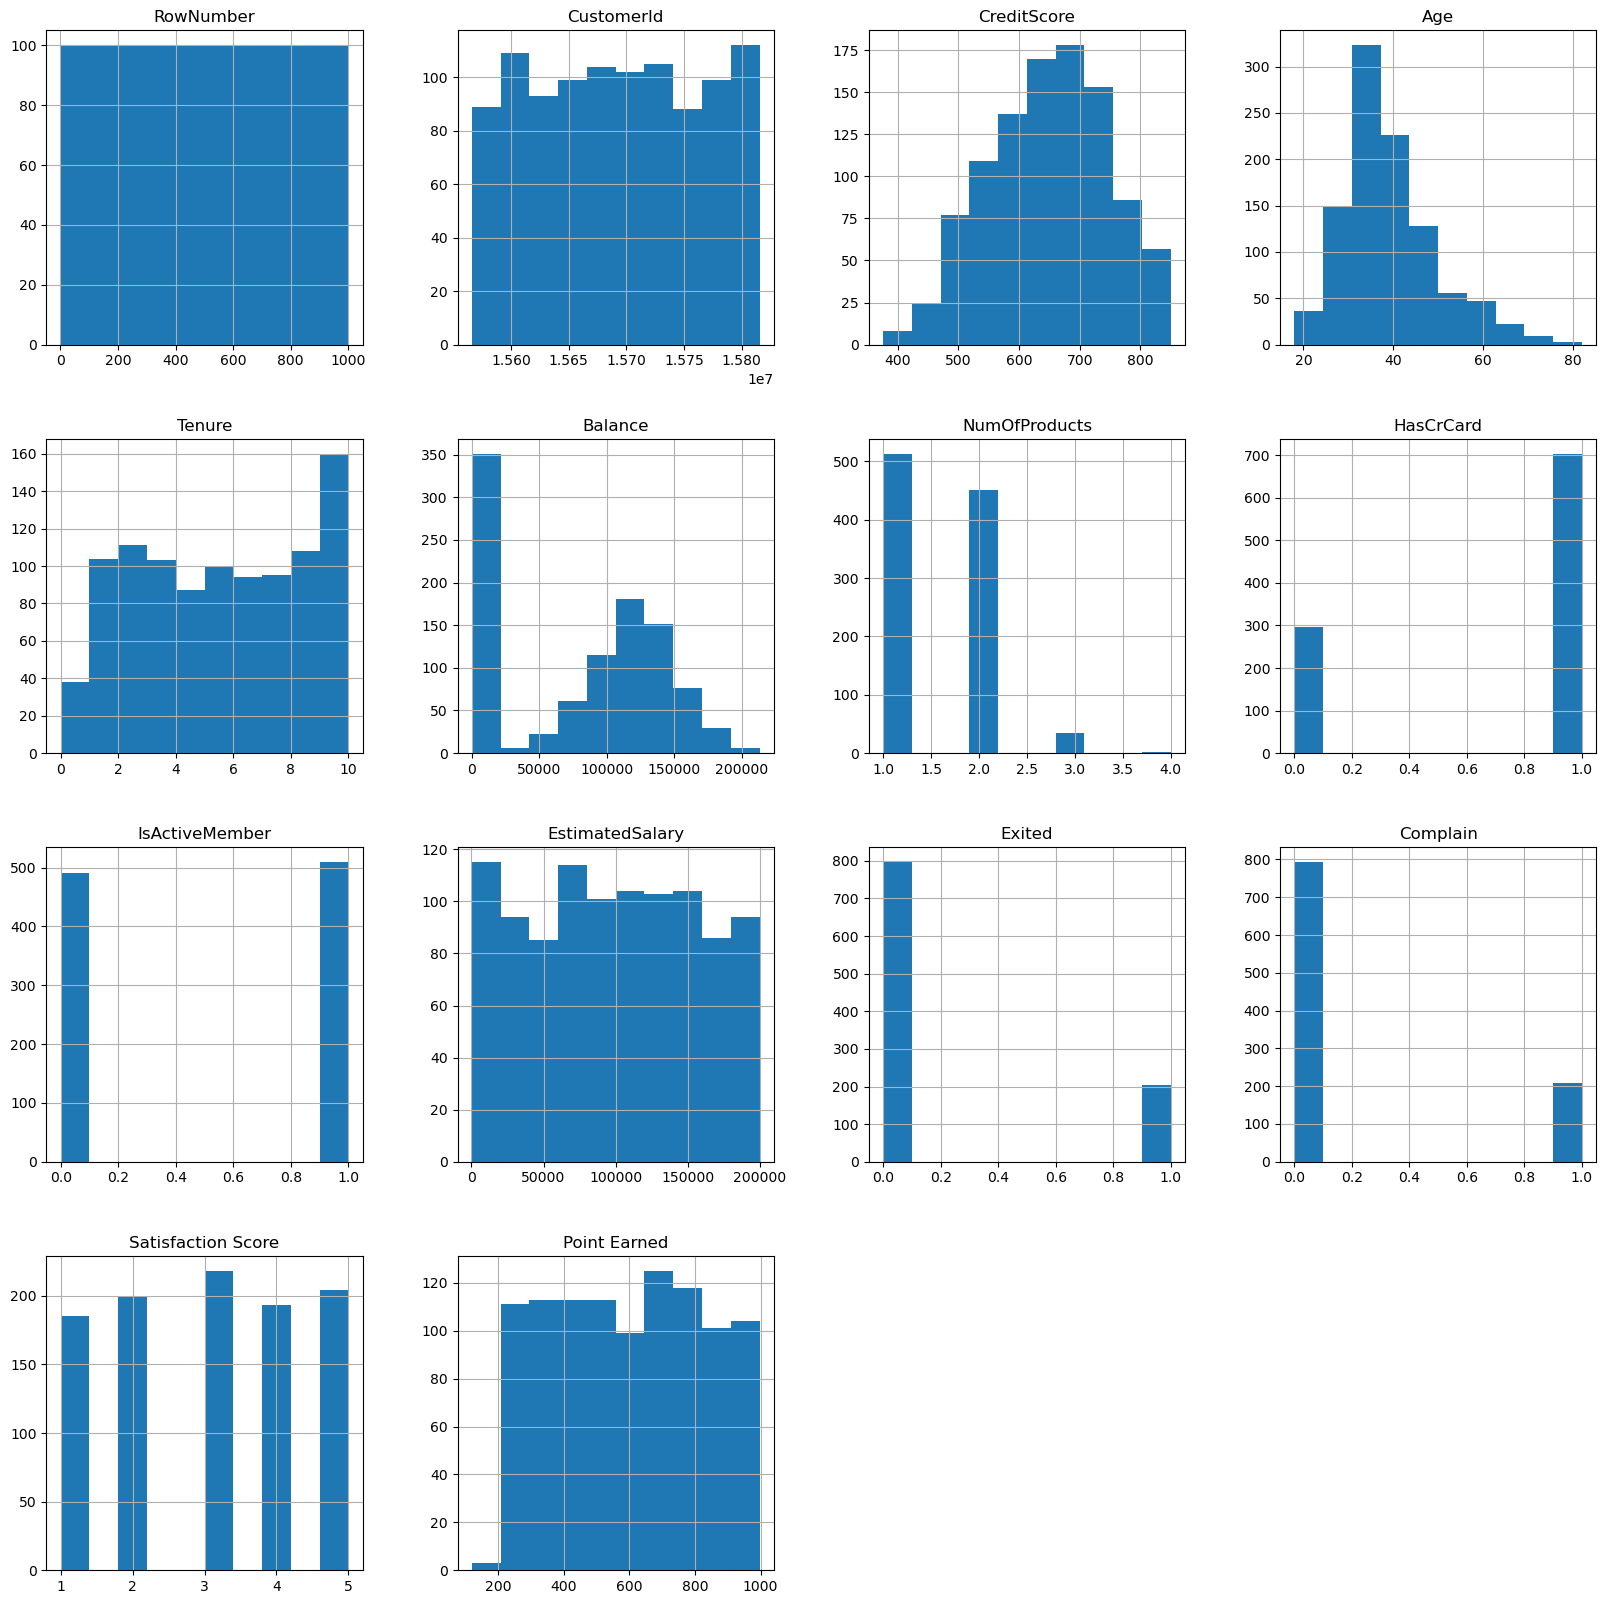

In [15]:
df_copy1.hist(figsize=(20,20))
plt.show()

Correlation : Examining some of most significant correlations. note that correlation coefficients only measure linear correlations.

In [16]:
# make a copy of the working dataset to correlation dataset
df_cor = df_copy1.copy()

# Handle categorical features
df_cor['Gender'] = df_cor['Gender'].map({'Female': 0, 'Male': 1})

In [17]:
# Filter to only numeric columns
numeric_cols = df_cor.select_dtypes(include=['number']).columns
df_cor = df_cor[numeric_cols]

df_cor[numeric_cols].corrwith(df_cor['Exited'])
df_cor.corrwith(df_cor['Exited'], numeric_only=True)
print(df_cor.corrwith(df_cor['Exited']).sort_values(ascending=False))



Exited                1.000000
Complain              0.969504
Age                   0.296069
Balance               0.098233
Point Earned          0.008810
HasCrCard             0.003193
CustomerId           -0.009208
RowNumber            -0.011734
EstimatedSalary      -0.011814
Satisfaction Score   -0.020134
NumOfProducts        -0.056644
Tenure               -0.060602
CreditScore          -0.064776
Gender               -0.127991
IsActiveMember       -0.212636
dtype: float64


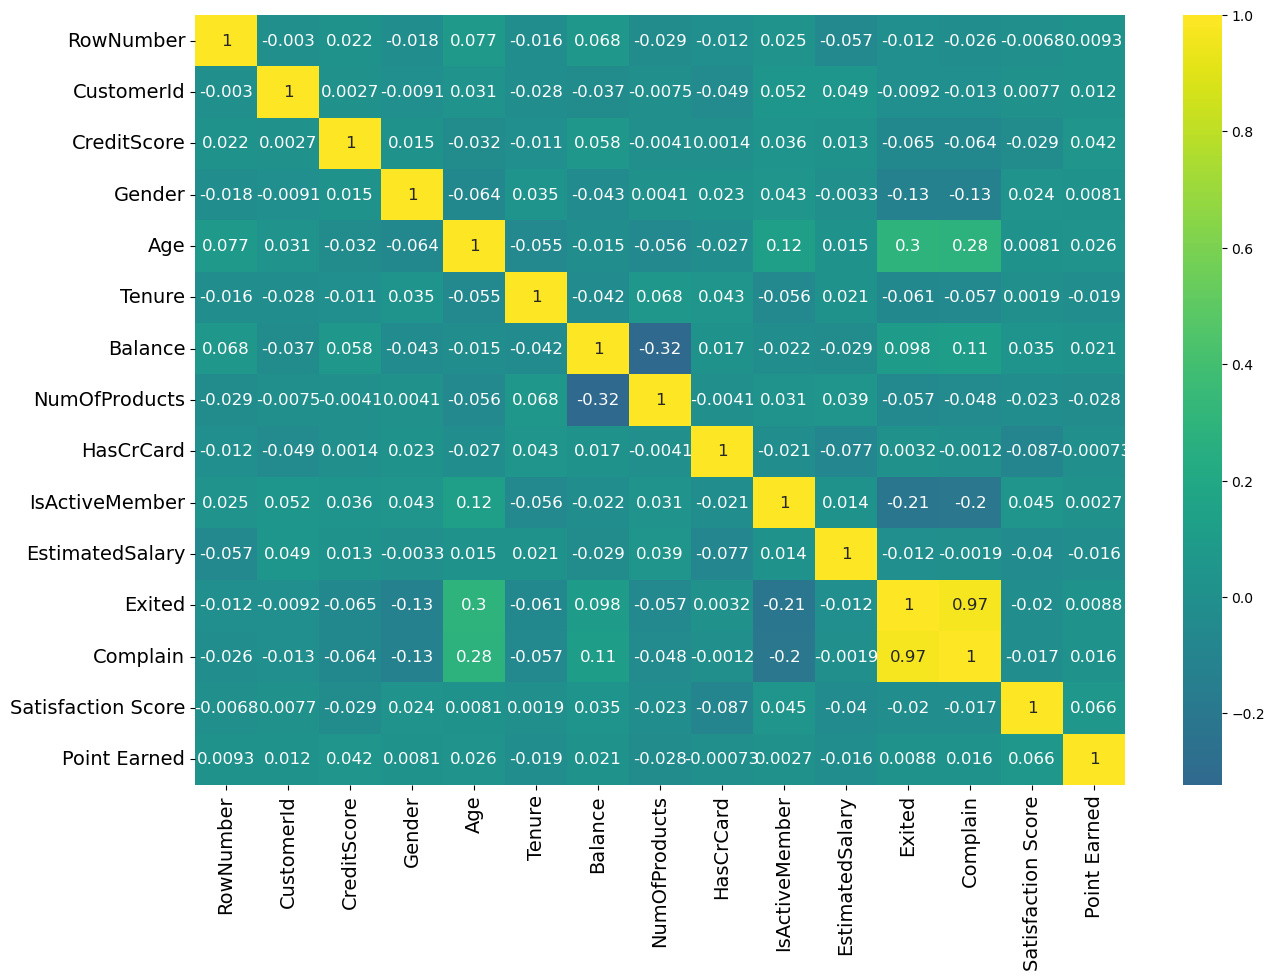

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_cor.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
from scipy import stats

# Test relationship between Balance and HasCrCard
corr, p_value = stats.pearsonr(df_cor['Complain'], df_cor['Exited'])

alpha = 0.05
if p_value < alpha:
    print('There is a Significant correlation')
else:
    print('No significant correlation found')

# Can repeat for other features when needed.

There is a Significant correlation


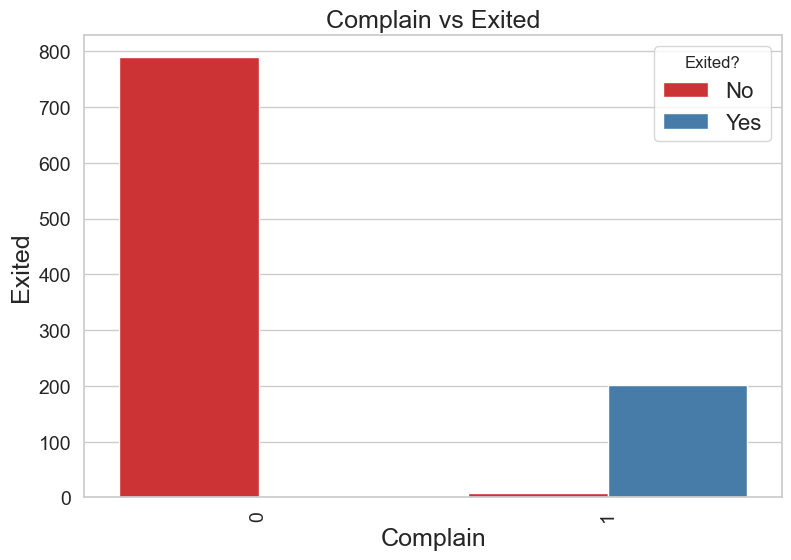

In [20]:
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.countplot(x="Complain", data=df_copy1,hue='Exited')
plt.xlabel("Complain",fontsize=18)
plt.ylabel("Exited",fontsize=18)
plt.title("Complain vs Exited",fontsize=18)
plt.legend(title="Exited?", labels=["No", "Yes"],fontsize=16)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [21]:
# Extract the columns of interest
columna1 = df_copy1['Complain']
columna2 = df_copy1['Exited']

# Calculate the values of a, b, and c
a = sum((columna1 == 1) & (columna2 == 1))
b = sum((columna1 == 1) & (columna2 == 0))
c = sum((columna1 == 0) & (columna2 == 1))

# Calculate the adjusted Jaccard coefficient
adjusted_jaccard = a / (a + b + c)
print(f"Adjusted Jaccard Coefficient: {adjusted_jaccard:.4f}")

Adjusted Jaccard Coefficient: 0.9526


In [22]:
df_copy1.nunique().sort_values(ascending=False)

RowNumber             1000
EstimatedSalary       1000
CustomerId            1000
Surname                740
Balance                650
Point Earned           565
CreditScore            354
Age                     60
Tenure                  11
Satisfaction Score       5
Card Type                4
NumOfProducts            4
Geography                3
Gender                   2
HasCrCard                2
IsActiveMember           2
Exited                   2
Complain                 2
dtype: int64

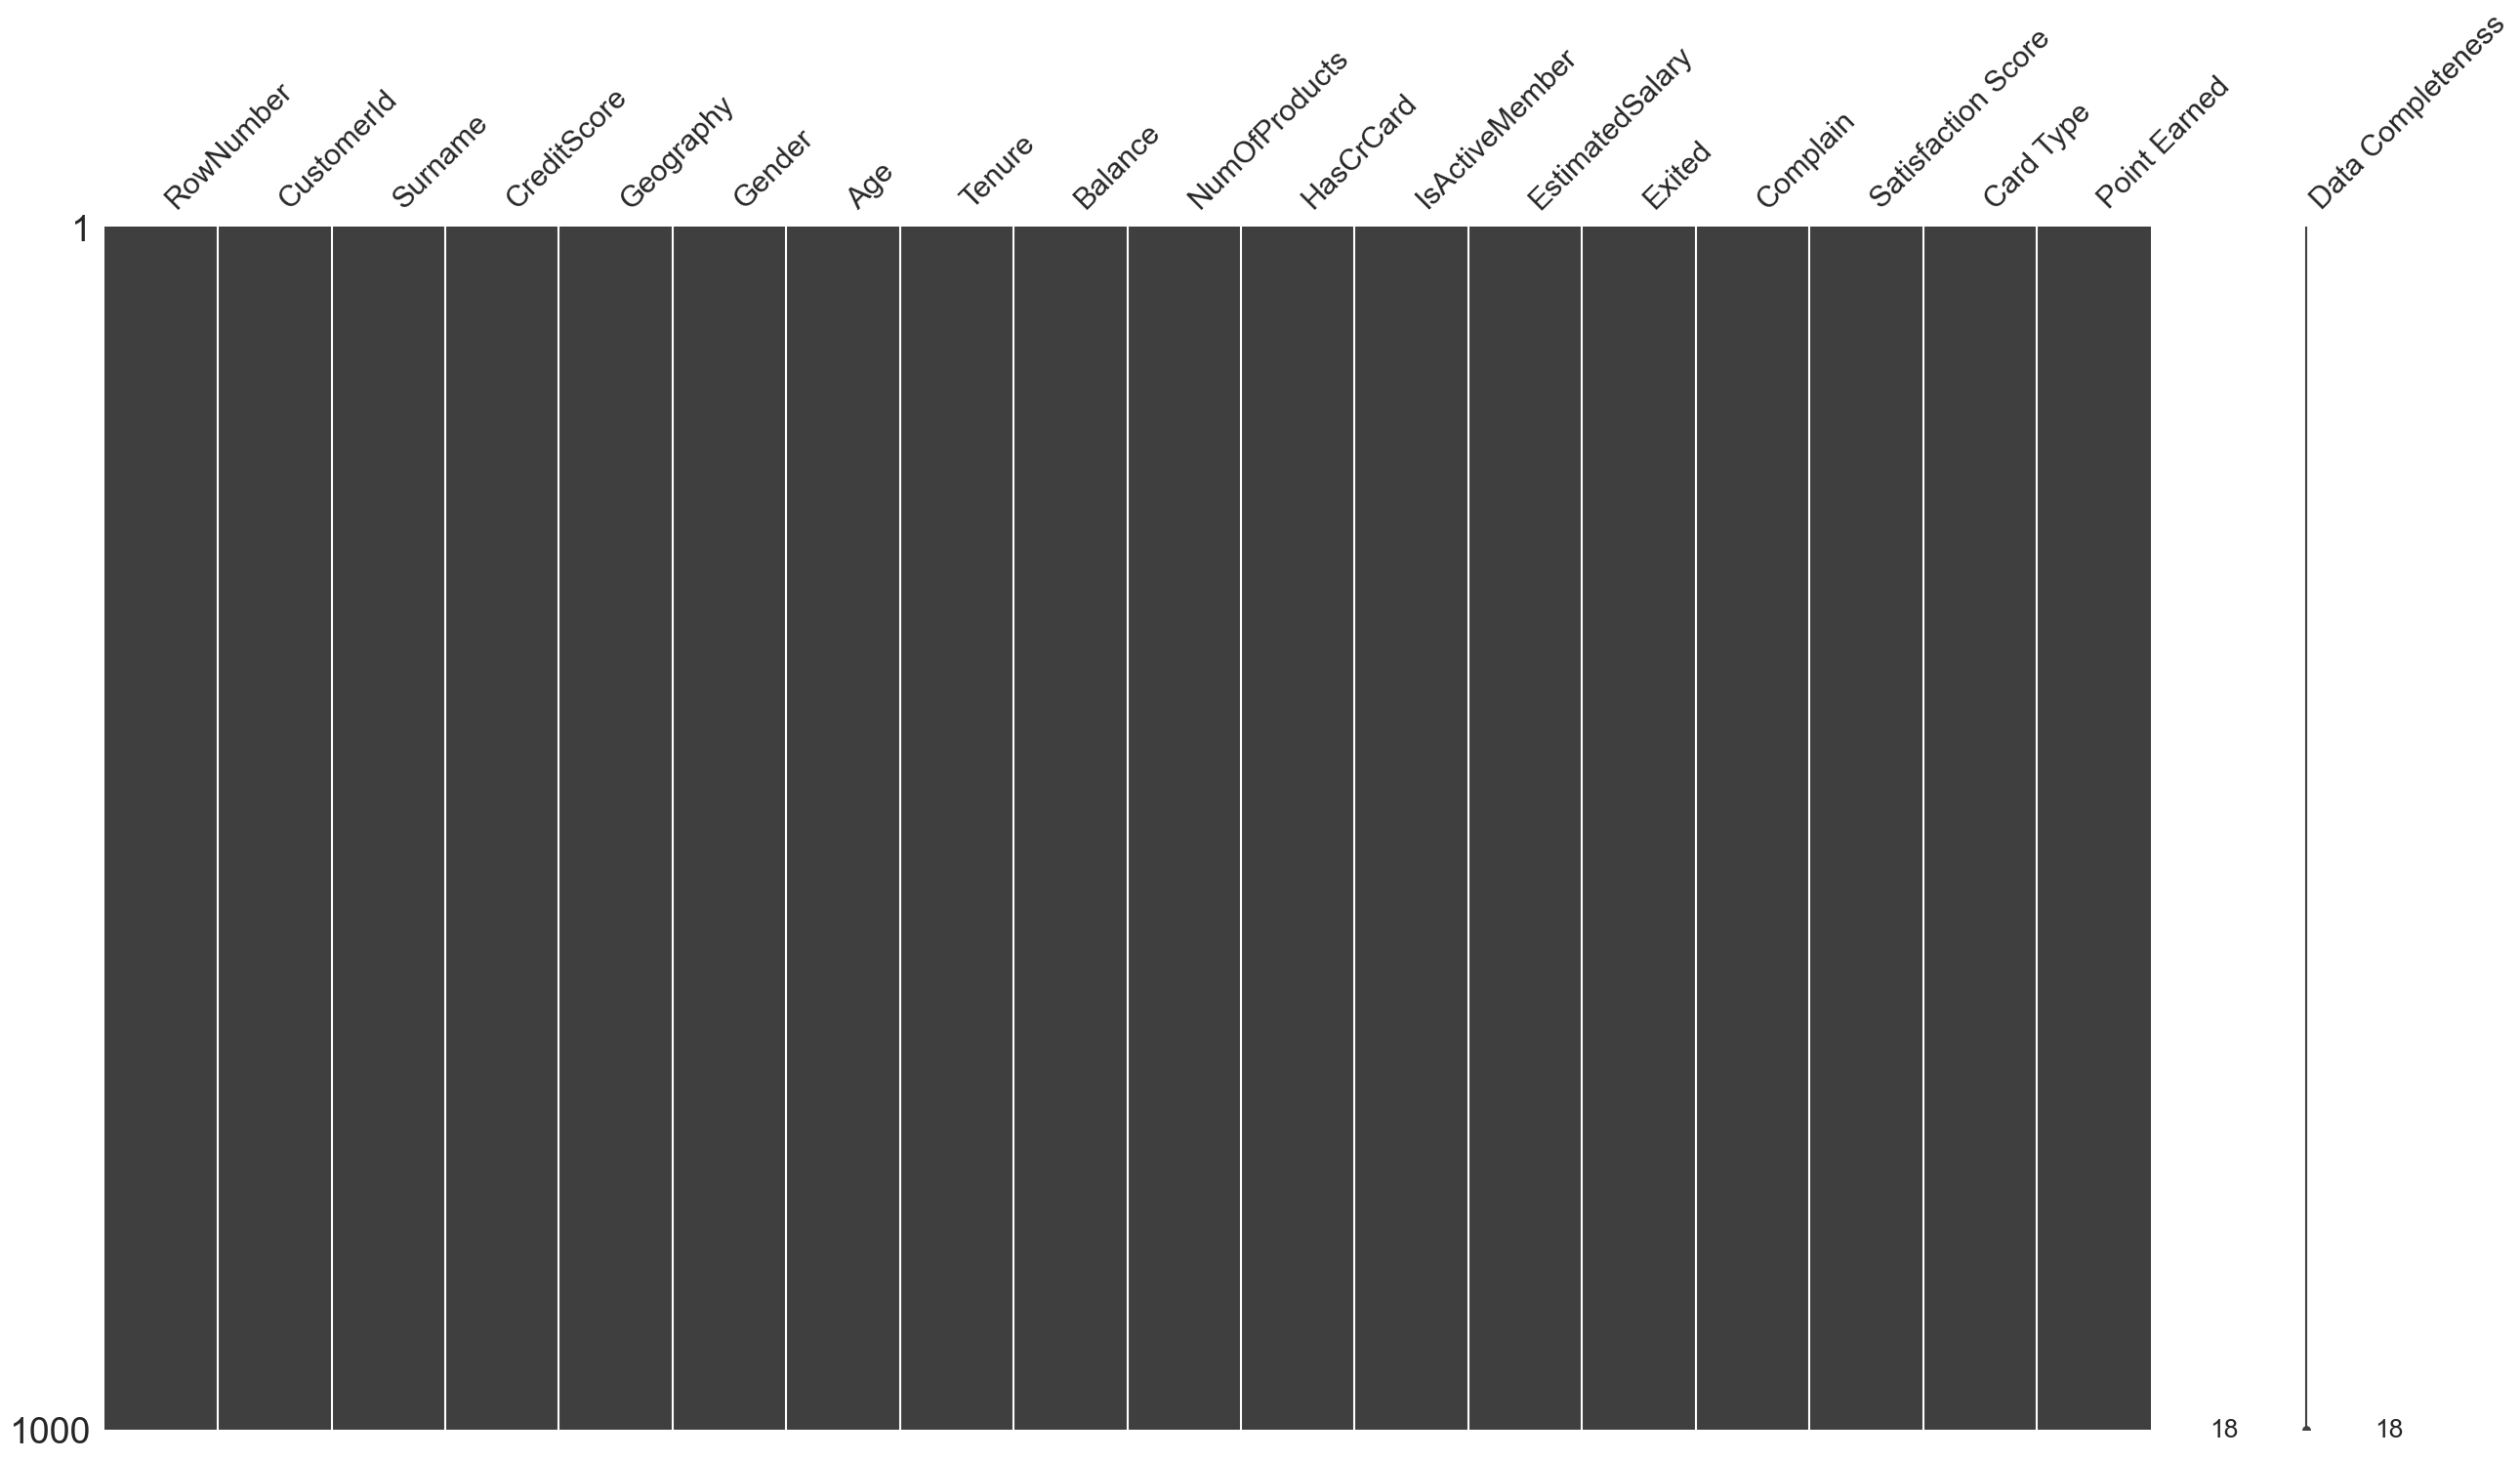

In [23]:
# @title Check completeness of data
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check for null values
msno.matrix(df_copy1, labels=[df_copy1.columns], figsize=(30, 16), fontsize=22)

# Show the plot
plt.show()


In [24]:
selected_columns = ['Satisfaction Score', 'Card Type', 'NumOfProducts', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain']

for column in selected_columns:
    unique_values = df_copy1[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Satisfaction Score': [2 3 5 4 1]
Unique values in column 'Card Type': ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
Unique values in column 'NumOfProducts': [1 3 2 4]
Unique values in column 'Geography': ['France' 'Spain' 'Germany']
Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'HasCrCard': [1 0]
Unique values in column 'IsActiveMember': [1 0]
Unique values in column 'Complain': [1 0]


In [25]:
df_subset1 = df_copy1.copy()

CreditScore_bins = [300, 400, 500, 600, 700, 800,900]
CreditScore_labels = [ '300-400', '400-500', '500-600', '600-700', '700-800','800-900']
df_subset1['Credit_Score Set'] = pd.cut(df_subset1['CreditScore'], bins=CreditScore_bins, labels=CreditScore_labels)
No_of_customers_CreditScore_Exited = df_subset1.groupby(['Credit_Score Set', 'Exited']).size().reset_index(name='Number of Customers')
No_of_customers_CreditScore_Exited

Credit_Score Set  Exited  Number of Customers
0           300-400       0                    0
1           300-400       1                    2
2           400-500       0                   52
3           400-500       1                   16
4           500-600       0                  191
5           500-600       1                   54
6           600-700       0                  290
7           600-700       1                   73
8           700-800       0                  214
9           700-800       1                   49
10          800-900       0                   49
11          800-900       1                   10

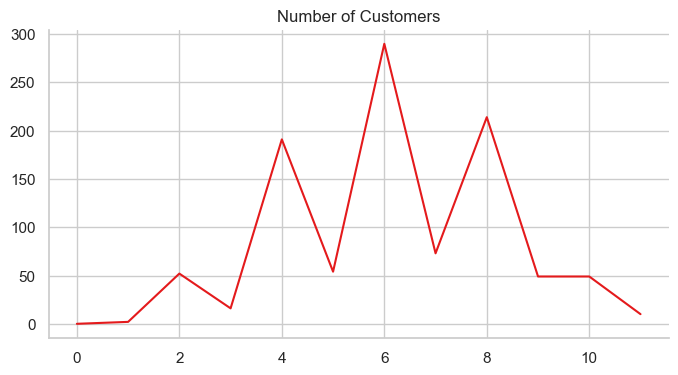

In [26]:
from matplotlib import pyplot as plt
No_of_customers_CreditScore_Exited['Number of Customers'].plot(kind='line', figsize=(8, 4), title='Number of Customers')
plt.gca().spines[['top', 'right']].set_visible(False)

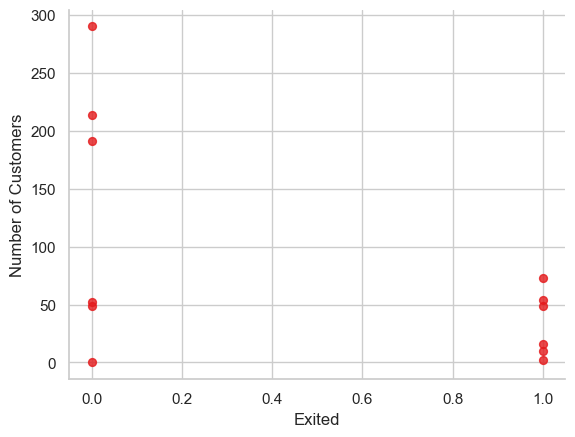

In [27]:
from matplotlib import pyplot as plt
No_of_customers_CreditScore_Exited.plot(kind='scatter', x='Exited', y='Number of Customers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
df_copy1.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

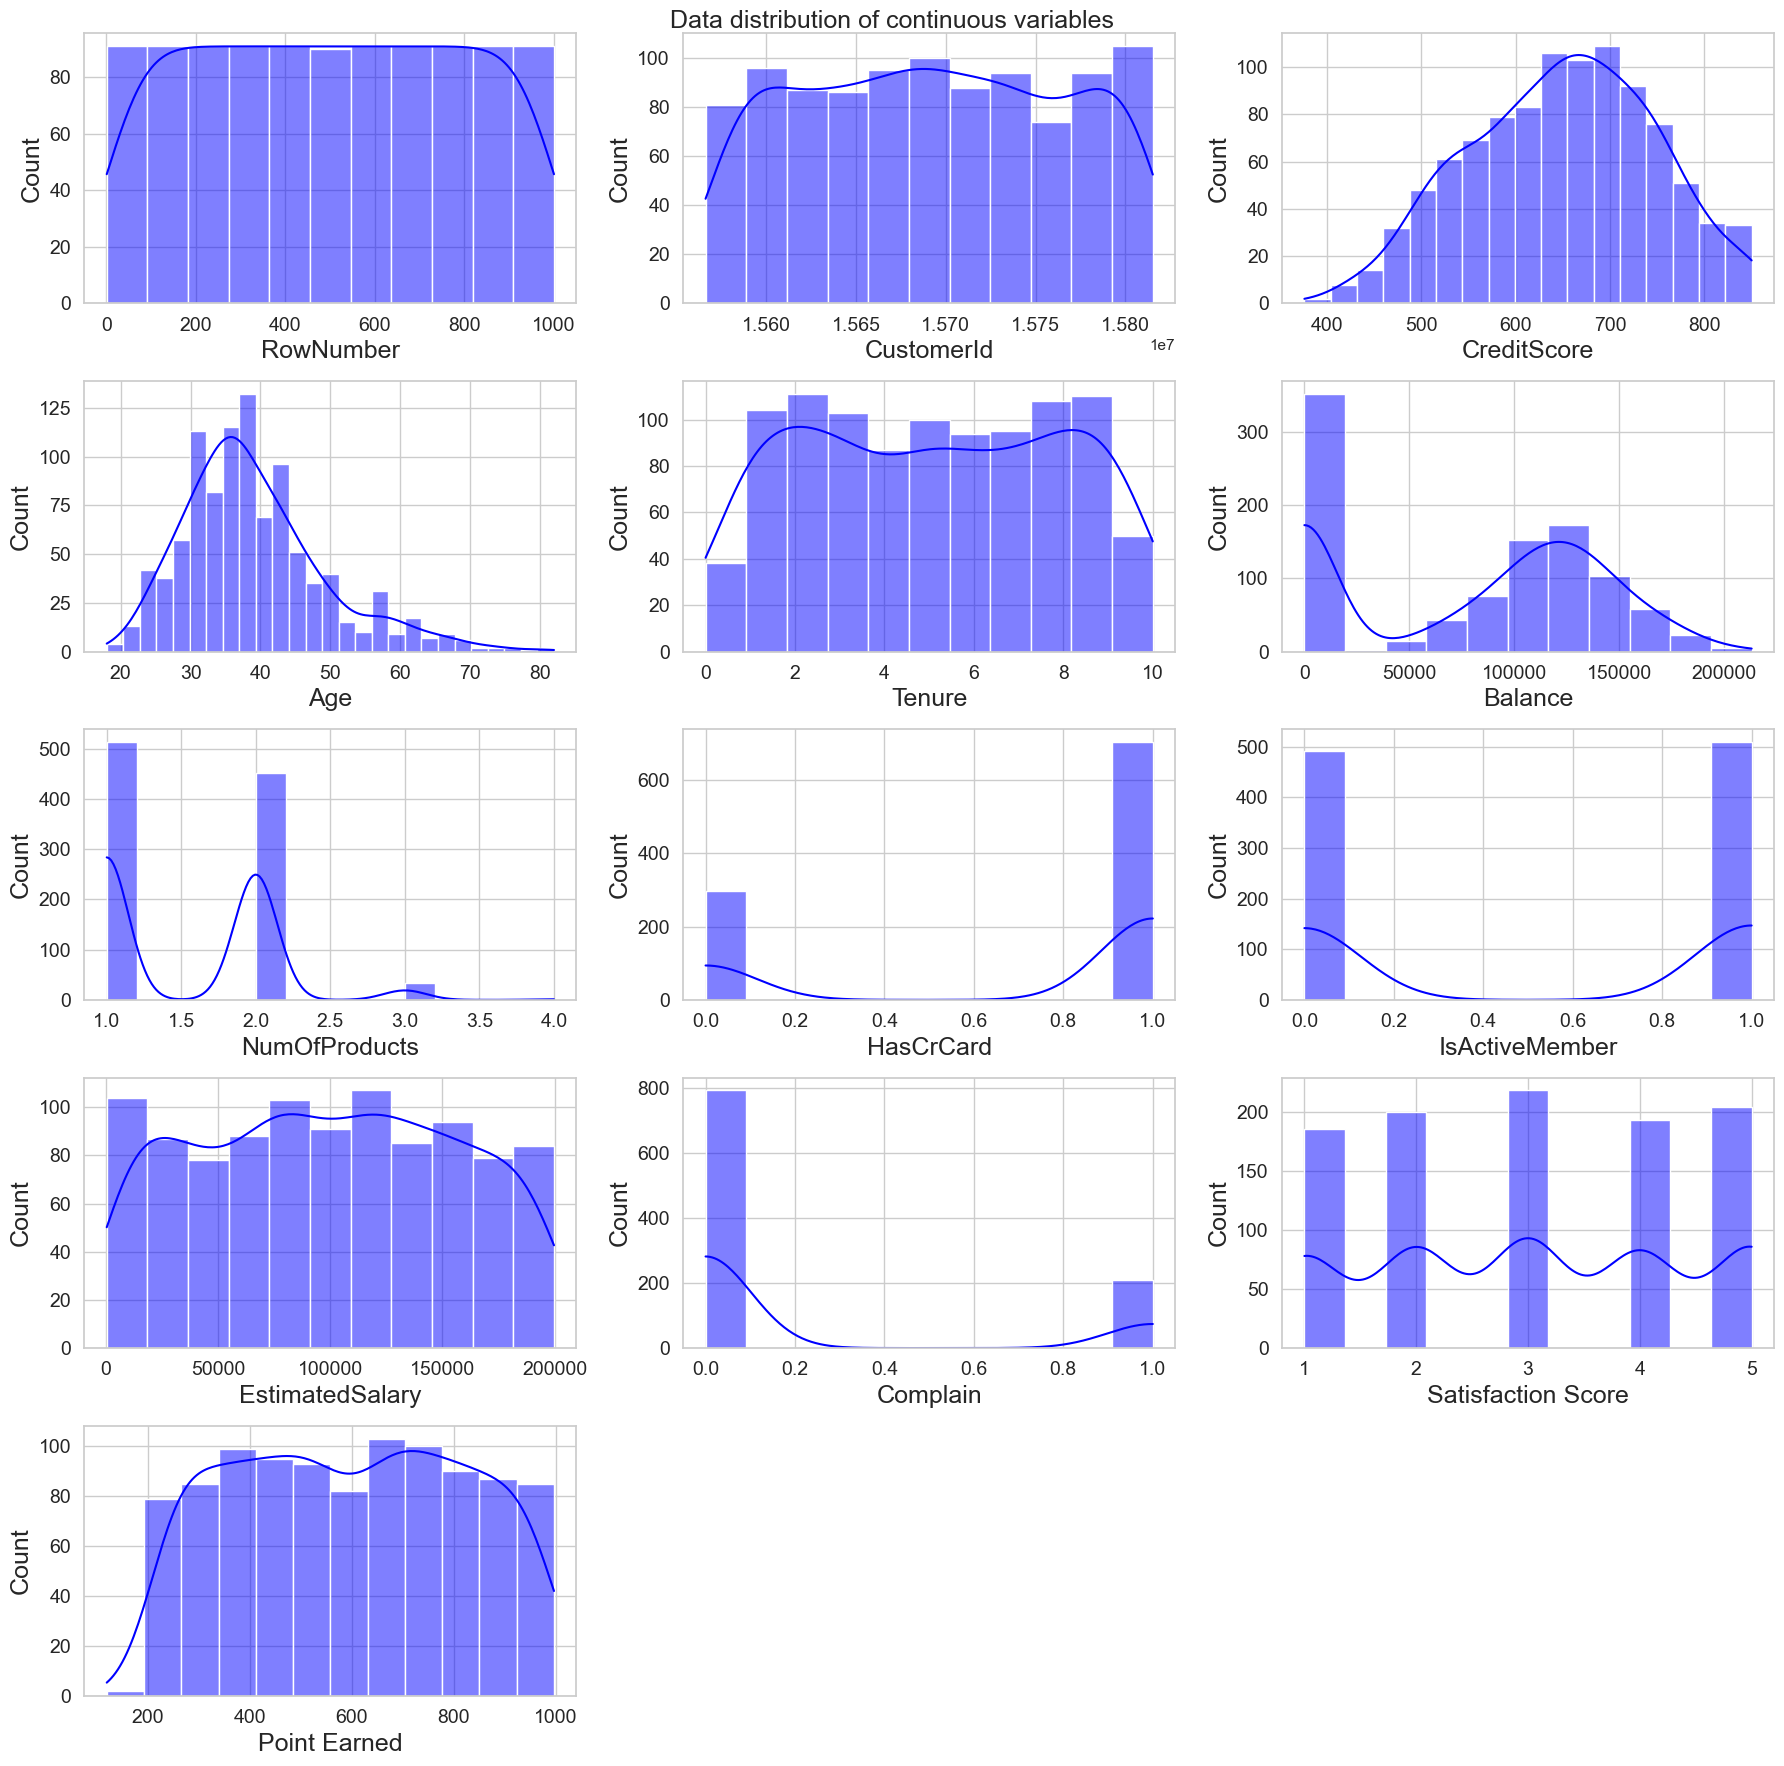

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 18))

# Selecting numerical columns (excluding 'Exited')
numerical_columns = df_copy1.drop(['Exited'], axis=1).select_dtypes(include=['int', 'float']).columns

total_columns = len(numerical_columns)
rows = total_columns // 3 + 1 if total_columns % 3 != 0 else total_columns // 3

for i, col in enumerate(numerical_columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(rows, 3, i + 1)  # Creating a subplot for each column.

    # Plotting the histogram for each column
    sns.histplot(data=df_copy1, x=col, ax=ax, color='blue', kde=True)

    # Setting labels and ticks
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)

# Adjusting layout and adding a title
plt.suptitle('Data distribution of continuous variables', fontsize=18)
plt.tight_layout()

# # Show the plot
plt.show()


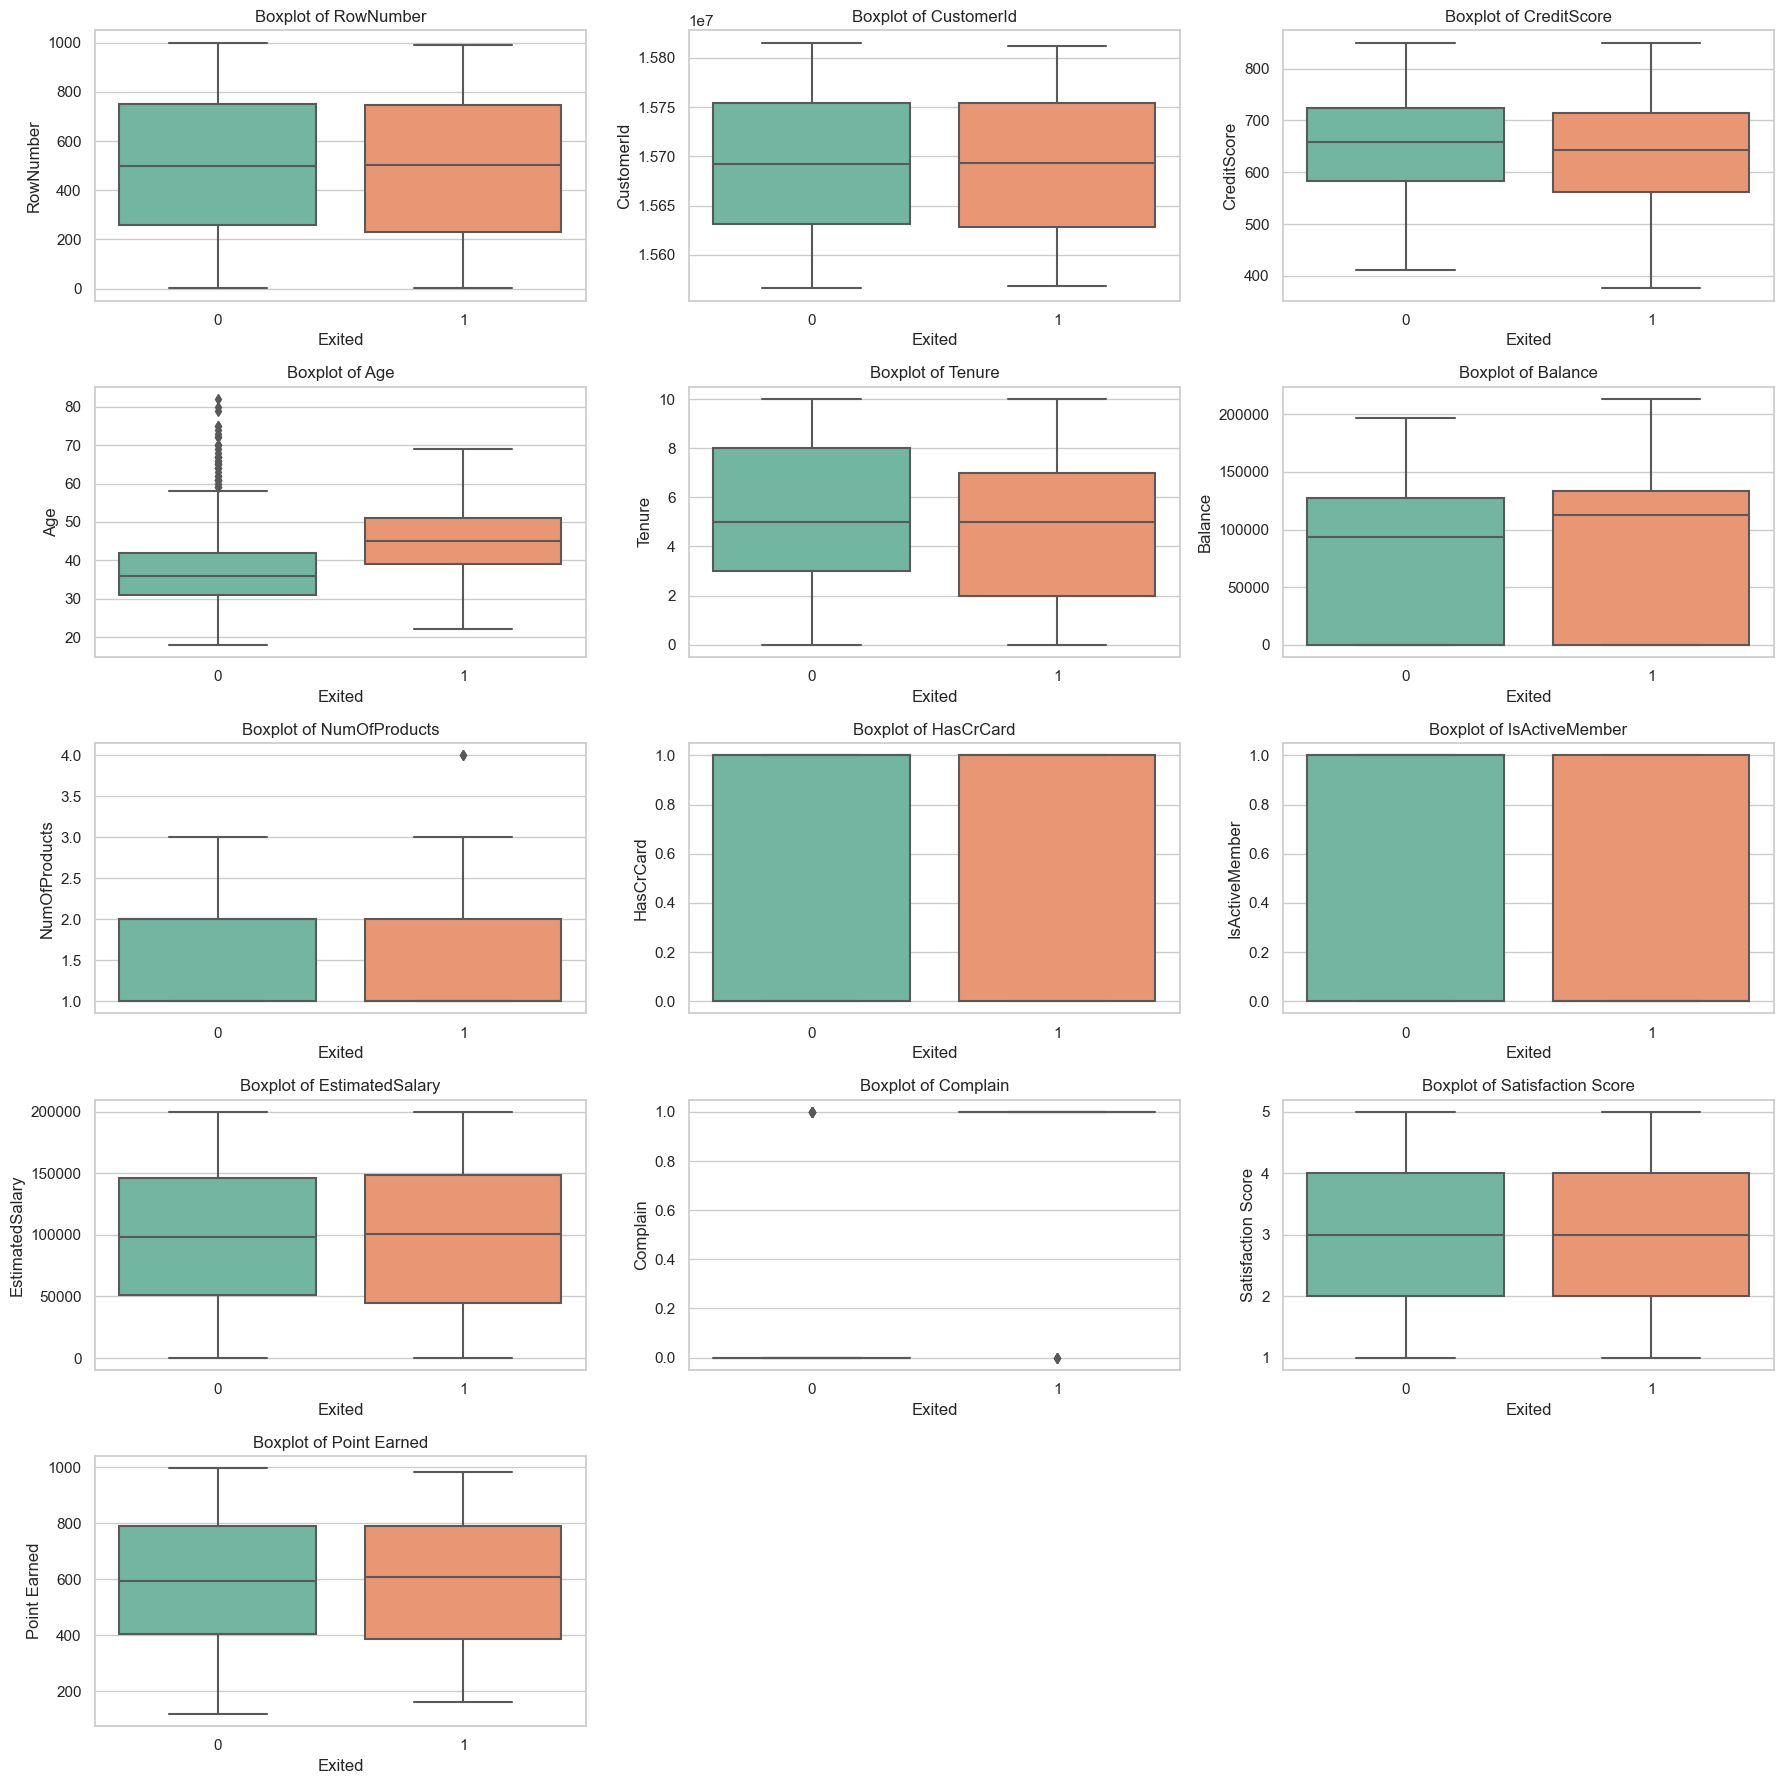

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 18))

# Selecting numerical columns (excluding 'Exited')
numerical_columns = df_copy1.drop(['Exited'], axis=1).select_dtypes(include=['int', 'float']).columns

# Calculate the number of rows and columns based on the number of numerical columns
total_columns = len(numerical_columns)
rows = total_columns // 3 + 1 if total_columns % 3 != 0 else total_columns // 3

# Creating box plots for each continuous variable
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(data=df_copy1, x='Exited', y=col, palette='Set2')  # 'Exited' on x-axis for comparison
    plt.title(f'Boxplot of {col}')

# Adjusting layout
plt.tight_layout()
plt.show()


The figure layout has changed to tight


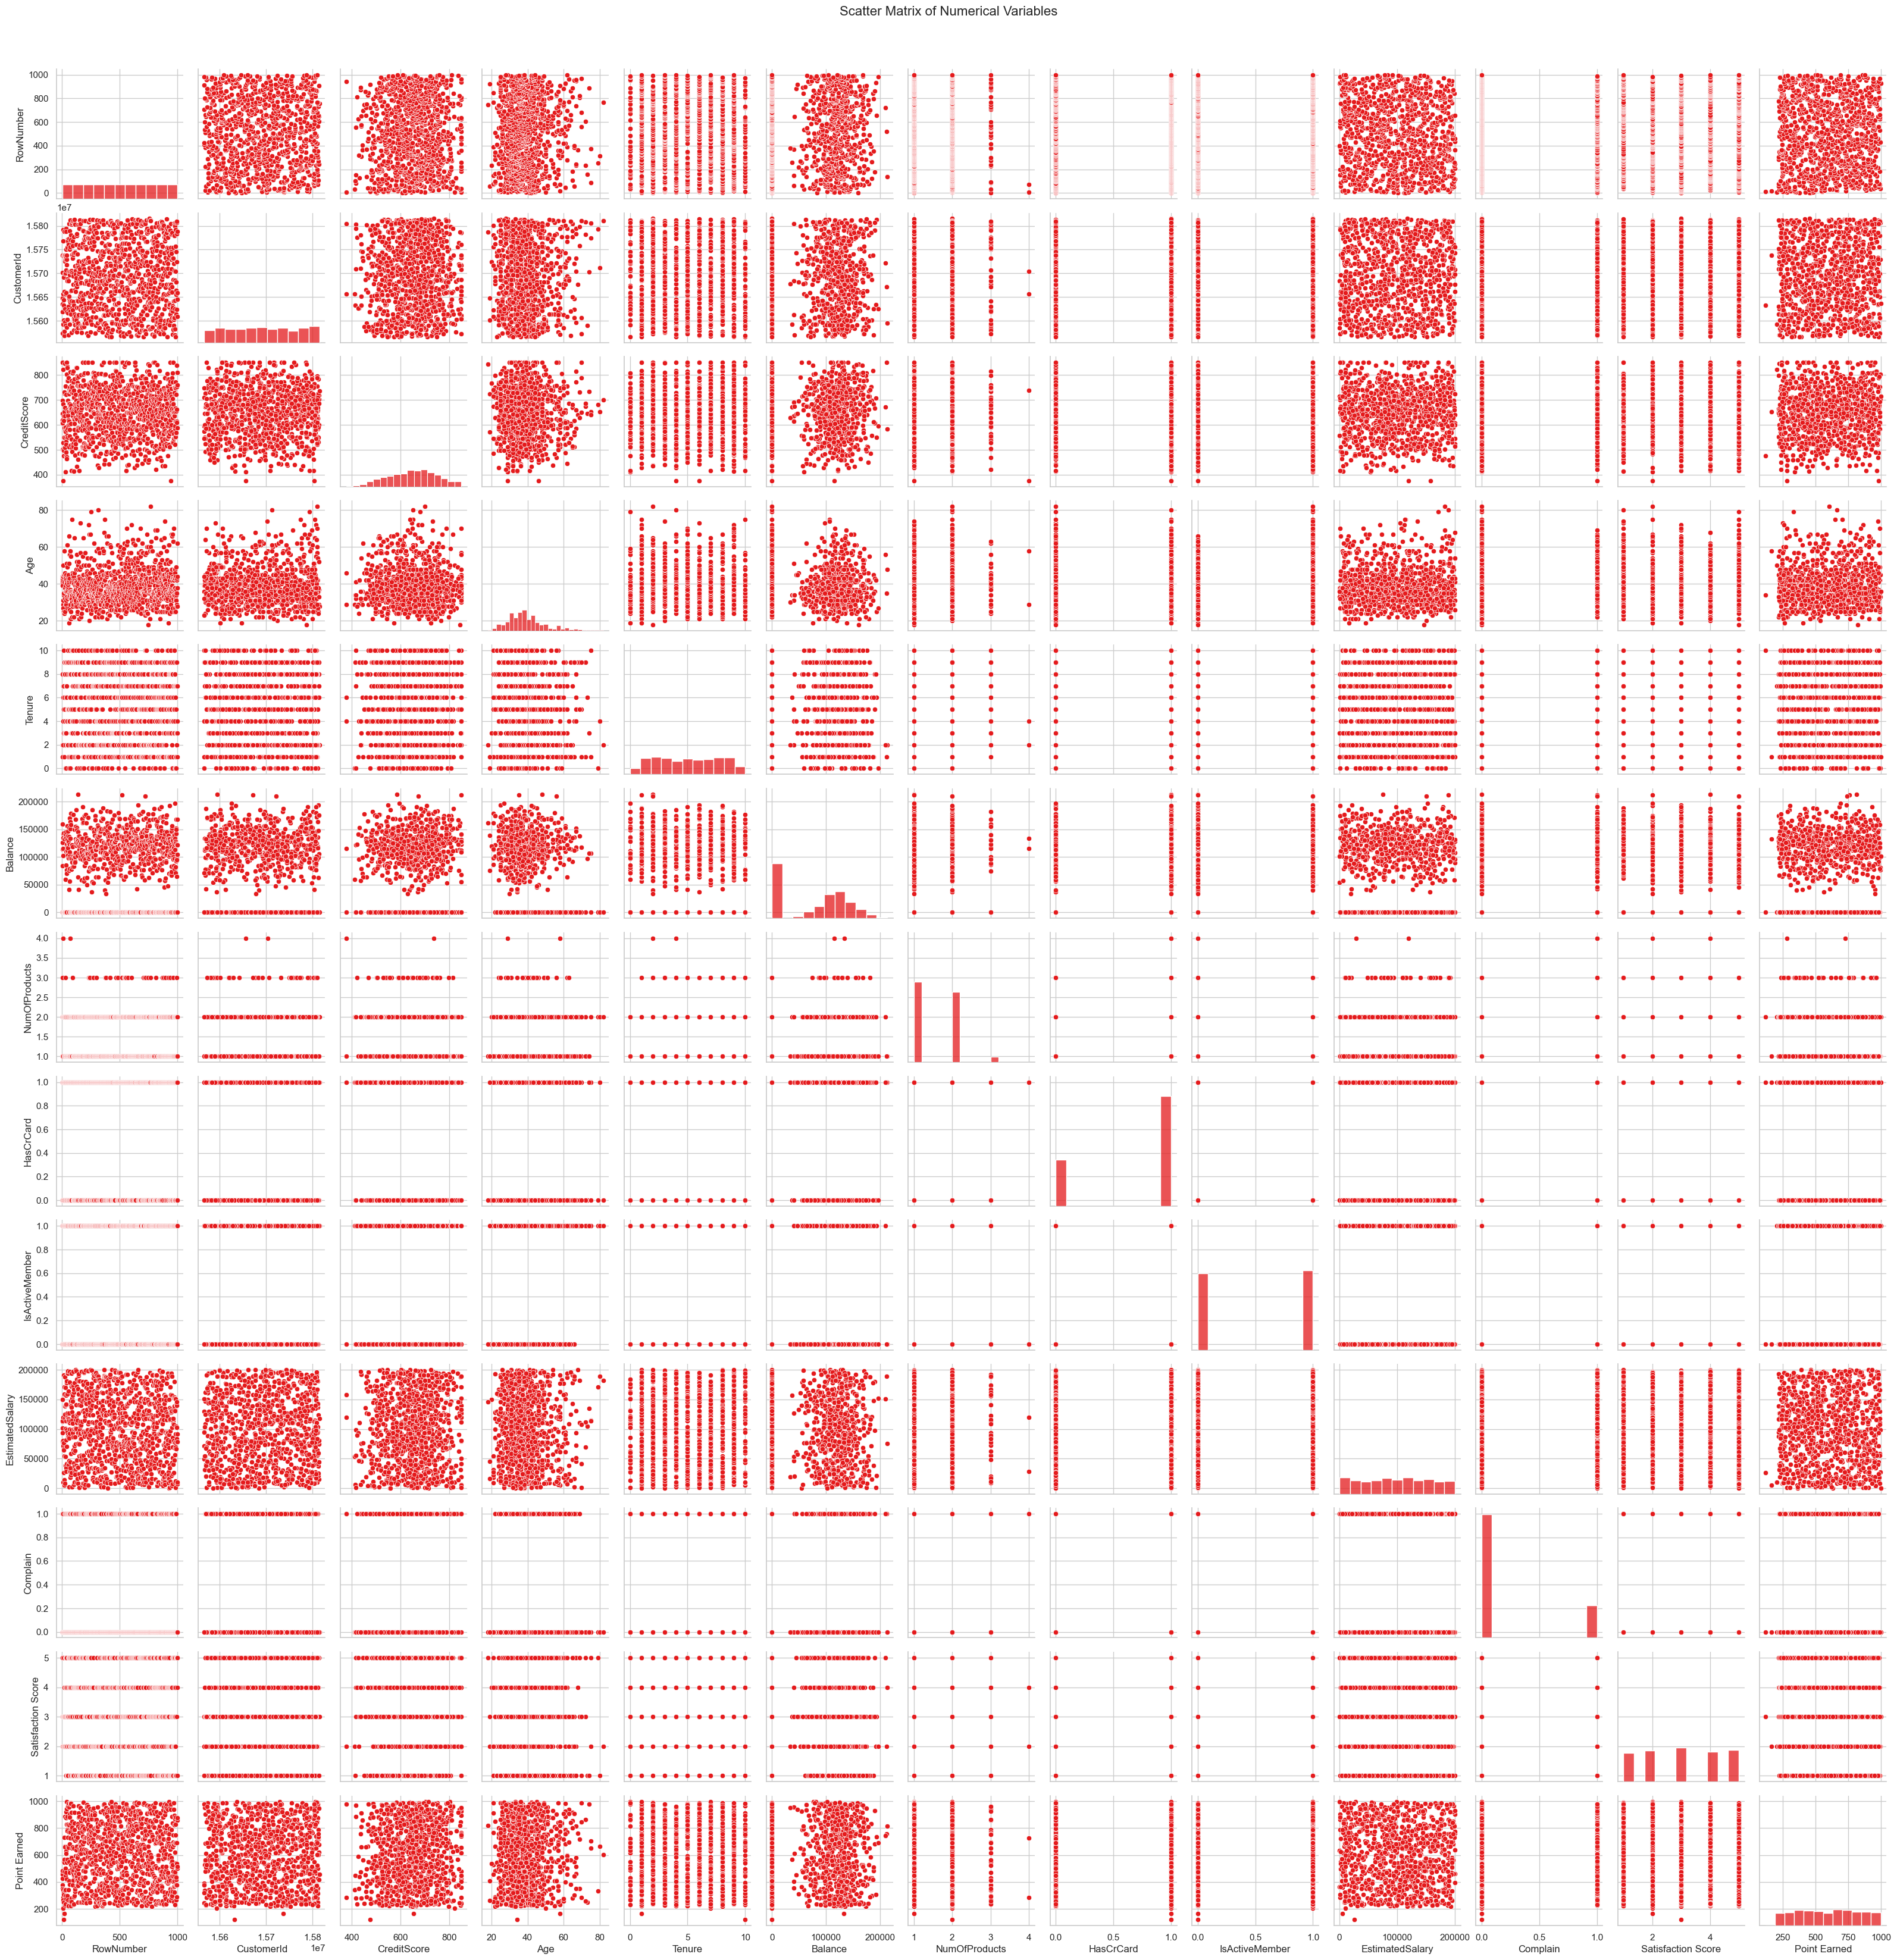

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns (excluding 'Exited')
numerical_columns = df_copy1.drop(['Exited'], axis=1).select_dtypes(include=['int', 'float']).columns

# Create a scatter matrix
sns.pairplot(df_copy1[numerical_columns])
plt.suptitle('Scatter Matrix of Numerical Variables', y=1.02, fontsize=16)
plt.show()



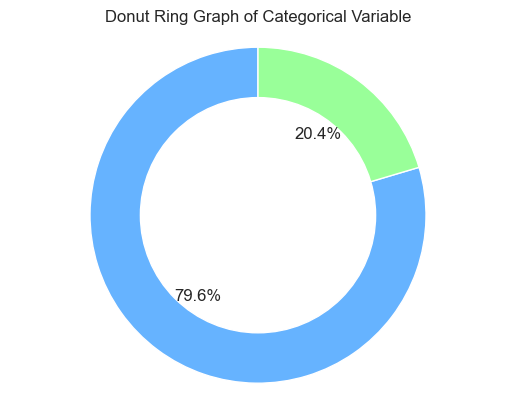

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df_copy1['Exited'].value_counts()

# Create a donut ring graph
fig, ax = plt.subplots()

# Plot the pie chart
wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])

# Draw a white circle in the center to create the donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title('Donut Ring Graph of Categorical Variable')

# Show the plot
plt.show()


In [33]:
df_subset = df_copy1.copy()

In [34]:
print(df_subset.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [35]:
# Create a label encoder object
le = LabelEncoder()
encoded_columns = []  # List to store columns that were label encoded

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0   #variable initialized. It will be used to keep track of the number of columns that have been label encoded.
for col in df_subset.columns[1:]:
    if df_subset[col].dtype == 'object':
        if len(list(df_subset[col].unique())) <= 2:
            le.fit(df_subset[col])
            df_subset[col] = le.transform(df_subset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
print('Columns label encoded:', encoded_columns)

1 columns were label encoded.
Columns label encoded: []


In [36]:
# Split categorical and numerical columns into separate dataframes

# Identify categorical and numerical columns
categorical_cols = df_subset.select_dtypes(include=['object']).columns
numerical_cols = df_subset.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Create dataframes for categorical and numerical columns
df_categorical = df_subset[categorical_cols]
df_numerical = df_subset[numerical_cols]

# Check: Print the first few rows of each dataframe
print("Categorical Dataframe:")
print(df_categorical.head())

print("\nNumerical Dataframe:")
print(df_numerical.head())

Categorical Dataframe:
    Surname Geography Card Type
0  Hargrave    France   DIAMOND
1      Hill     Spain   DIAMOND
2      Onio    France   DIAMOND
3      Boni    France      GOLD
4  Mitchell     Spain      GOLD

Numerical Dataframe:
   RowNumber  CustomerId  CreditScore  Gender  Age  Tenure    Balance  \
0          1    15634602          619       0   42       2       0.00   
1          2    15647311          608       0   41       1   83807.86   
2          3    15619304          502       0   42       8  159660.80   
3          4    15701354          699       0   39       1       0.00   
4          5    15737888          850       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0         

In [37]:
#Apply one-hot encoding or label encoding to convert categorical variables into a format suitable for machine learning models

df_encoded = pd.get_dummies(df_categorical, drop_first=True)
import seaborn as sns



<Axes: xlabel='Geography', ylabel='count'>

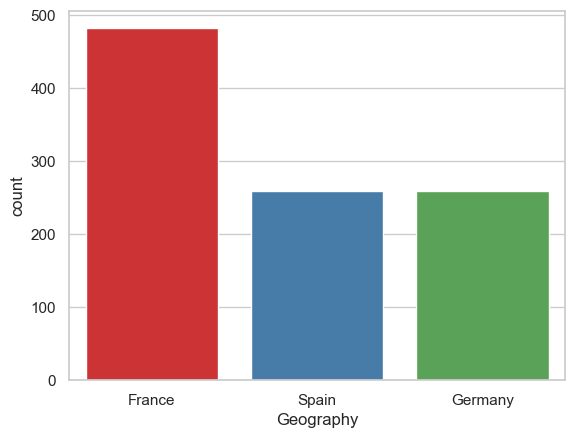

In [38]:
# Explore and Visualize Categorical Data
# Explore the distribution of categorical variables, check for class imbalances, and visualize relationships.
# Count plot for a categorical variable
import seaborn as sns
sns.countplot(x='Geography', data=df_categorical)



In [39]:
#  For Numerical Data:
# Impute Missing Values:Check for missing values in numerical columns and decide on an imputation strategy (mean, median, etc.).
# Impute missing values with the mean
df_numerical = df_numerical.fillna(df_numerical.mean())



In [40]:
from sklearn.preprocessing import StandardScaler
# Standardize or normalize numerical features to ensure they have similar scales, especially for algorithms sensitive to feature scaling.
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)


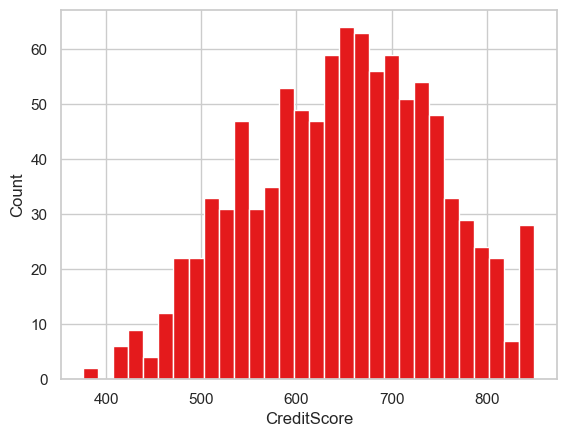

In [41]:
# Explore the distribution of numerical variables, check for outliers, and visualize relationships.

import matplotlib.pyplot as plt

# Example: Histogram for a numerical variable
plt.hist(df_numerical['CreditScore'], bins=30)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.show()


## Encoding

In [42]:
# Original categorical columns
cat_cols = ['RowNumber', 'Surname', 'Geography', 'Card Type']

# Handle unknown categories in the entire dataset
for col in cat_cols:
    df_subset[col] = df_subset[col].replace(['unknown_category'], np.nan)

# Drop columns you want to exclude
df_subset = df_subset.drop(['RowNumber', 'Surname', 'Geography', 'Card Type'], axis=1)

# One-hot encoding
df_encoded = pd.get_dummies(df_subset, dummy_na=True)

# Excluded columns
columns_to_exclude = ['Exited']  # Add other columns you want to drop
excluded_cols = df_encoded.columns.difference(columns_to_exclude)

# Create features (X) and target (y)
X = df_encoded.drop(columns_to_exclude, axis=1)
y = df_encoded['Exited']


# Splitting data into training and testing sets

In [43]:
# Create features (X) and target (y)
X = df_encoded.drop(columns_to_exclude, axis=1)
y = df_encoded['Exited']

# Print the excluded columns
print("Excluded Columns:", excluded_cols)


# Split the data into training, Temporary and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #,

# Check the lengths of temporary sets
print("length of X_temp sets:", len(X_temp))
print("length of y_temp sets:", len(y_temp))

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Drop 'Exited' column if it exists
X_train = X_train.drop('Exited', axis=1, errors='ignore')
X_test = X_test.drop('Exited', axis=1, errors='ignore')

# Ensure 'Exited' is not the name of the target variable
y_train = y_train.reset_index(drop=True) if y_train.name == 'Exited' else y_train
y_test = y_test.reset_index(drop=True) if y_test.name == 'Exited' else y_test



print("X_train", X_train.dtypes)
print("X_test", X_test.dtypes)
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)
print("y_train name:", y_train.name)
print("Unique values in y_train:", y_train.unique())


# Check the shapes of the resulting sets
print("Train Set Shape:     ", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:      ", X_test.shape)
print("Temporary Set Shape: ", X_temp.shape)



Excluded Columns: Index(['Age', 'Balance', 'Complain', 'CreditScore', 'CustomerId',
       'EstimatedSalary', 'Gender', 'HasCrCard', 'IsActiveMember',
       'NumOfProducts', 'Point Earned', 'Satisfaction Score', 'Tenure'],
      dtype='object')
length of X_temp sets: 300
length of y_temp sets: 300
X_train CustomerId              int64
CreditScore             int64
Gender                  int32
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
dtype: object
X_test CustomerId              int64
CreditScore             int64
Gender                  int32
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSa

In [44]:
from sklearn.feature_selection import VarianceThreshold

# Assuming you have already defined X_train
X_train_selected = X_train.copy()

# Set the threshold value (you can adjust this based on your requirements)
threshold_value = 0.0

# Initialize VarianceThreshold with the threshold value
selector = VarianceThreshold(threshold=threshold_value)

# Fit and transform the data
X_train_selected = selector.fit_transform(X_train_selected)

# Print the selected features
print(X_train_selected)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected columns
selected_columns = X_train.columns[selected_feature_indices]

# Print the selected columns
print("Selected Columns:", selected_columns)



[[1.5667896e+07 8.3300000e+02 1.0000000e+00 ... 0.0000000e+00
  3.0000000e+00 6.3300000e+02]
 [1.5624188e+07 7.1200000e+02 0.0000000e+00 ... 0.0000000e+00
  5.0000000e+00 4.6000000e+02]
 [1.5685357e+07 7.5000000e+02 0.0000000e+00 ... 0.0000000e+00
  3.0000000e+00 4.4700000e+02]
 ...
 [1.5634245e+07 7.5800000e+02 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 8.1000000e+02]
 [1.5677369e+07 5.5400000e+02 0.0000000e+00 ... 0.0000000e+00
  2.0000000e+00 6.0600000e+02]
 [1.5812007e+07 6.7000000e+02 1.0000000e+00 ... 0.0000000e+00
  3.0000000e+00 7.2300000e+02]]
Selected Columns: Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')


In [45]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

# Define your features (X) and target variable (y)
X = df_encoded.drop(columns_to_exclude, axis=1)
y = df_encoded['Exited']

# Split the data into training, temporary, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Handling NaN values if any
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Function to identify and remove constant features
def remove_constant_features(X_train, X_test):
    constant_filter = VarianceThreshold()
    X_train_filtered = constant_filter.fit_transform(X_train)
    X_test_filtered = constant_filter.transform(X_test)

    # Print information about constant features
    constant_columns = [col for col in X_train.columns if col not in X_train.columns[constant_filter.get_support()]]
    #print(f"Constant columns: {constant_columns}")

    return X_train_filtered, X_test_filtered

# Assuming X_train and X_test are your feature matrices
# Remove constant features
X_train_filtered, X_test_filtered = remove_constant_features(X_train, X_test)

# Feature Selection - SelectKBest
k = 10
selector_kbest = SelectKBest(f_classif, k=k)
X_train_selected_kbest = selector_kbest.fit_transform(X_train_filtered, y_train)
X_test_selected_kbest = selector_kbest.transform(X_test_filtered)

# Feature Selection - Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier()
selector_rfe = RFE(estimator, n_features_to_select=k)
X_train_selected_rfe = selector_rfe.fit_transform(X_train_filtered, y_train)
X_test_selected_rfe = selector_rfe.transform(X_test_filtered)

# Dimensionality Reduction - PCA
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train_filtered)
X_test_pca = pca.transform(X_test_filtered)


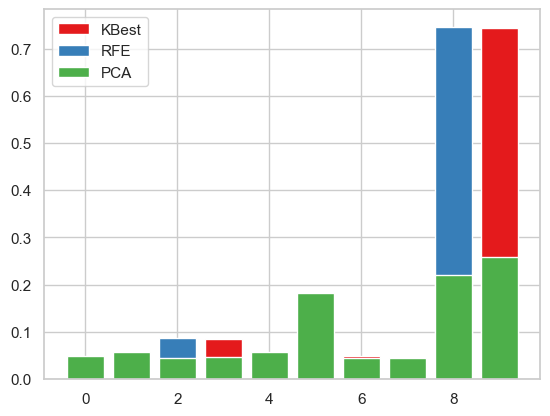

Full Feature Set Accuracy: 0.98
KBest Accuracy: 0.98
RFE Accuracy: 0.3933333333333333
PCA Accuracy: 0.98


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#  X_train_selected_kbest, X_train_selected_rfe, and X_train_pca are your feature sets
models = {
    'KBest': RandomForestClassifier().fit(X_train_selected_kbest, y_train),
    'RFE': RandomForestClassifier().fit(X_train_selected_rfe, y_train),
    'PCA': RandomForestClassifier().fit(X_train_pca, y_train)
}

# access the models using string keys
feature_importances_kbest = models['KBest'].feature_importances_
feature_importances_rfe = models['RFE'].feature_importances_
feature_importances_pca = models['PCA'].feature_importances_

# Plot feature importances for each model
plt.bar(range(len(feature_importances_kbest)), feature_importances_kbest, label='KBest')
plt.bar(range(len(feature_importances_rfe)), feature_importances_rfe, label='RFE')
plt.bar(range(len(feature_importances_pca)), feature_importances_pca, label='PCA')
plt.legend()
plt.show()

full_model = RandomForestClassifier().fit(X_train_scaled, y_train)

# Compare accuracy with full feature set
full_accuracy = accuracy_score(y_test, full_model.predict(X_test_scaled))
print(f"Full Feature Set Accuracy: {full_accuracy}")


# Train and evaluate models with different feature sets
models = {
    'KBest': RandomForestClassifier().fit(X_train_selected_kbest, y_train),
    'RFE': RandomForestClassifier().fit(X_train_selected_rfe, y_train),
    'PCA': RandomForestClassifier().fit(X_train_pca, y_train)
}

for name, model in models.items():
    y_pred = model.predict(X_test_selected_kbest)  # Adjust based on selected features
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


In [47]:
# Assuming you have the original dataset X_train
X_train_selected = X_train.copy()

# Drop unselected columns
X_train_selected = X_train_selected.iloc[:, selected_feature_indices]

# Now X_train_selected contains only the selected columns

# Assuming you have the original test dataset X_test
X_test_selected = X_test.copy()

# Drop unselected columns
X_test_selected = X_test_selected.iloc[:, selected_feature_indices]

# Now X_test_selected contains only the selected columns



Baseline ML
1. Trains a set of models like Logistic Regression, Random Forest, SVM etc.
2. Applies different feature selection methods for some models (RFE, SelectKBest etc).
3. Evaluates each model on train and test sets using classification metrics and cross-validation.
4. The approach is more basic, training each model separately without ensembling

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance

# Define a list of models along with their corresponding feature selection methods
models = [
    ('Logistic Regression', LogisticRegression(), None),
    ('Random Forest', RandomForestClassifier(n_estimators=100), SelectKBest(k=10)),
    ('Support Vector Machine', SVC(), RFE(estimator=RandomForestClassifier(), n_features_to_select=10)),
    ('PCA + Logistic Regression', LogisticRegression(), PCA(n_components=10)),
    ('Gradient Boosting', GradientBoostingClassifier(), None),
    ('AdaBoost', AdaBoostClassifier(), None),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5, weights='distance'), None),
    ('Naive Bayes', GaussianNB(), None),
    ('Neural Network', MLPClassifier(max_iter=500), None),
    ('XGBoost', XGBClassifier(), None),
]

# Increase the number of iterations for the neural network
model_nn = MLPClassifier(learning_rate='adaptive', max_iter=500, tol=1e-4)

# Adjust the smoothing parameter for Gaussian Naive Bayes
model_nb = GaussianNB(var_smoothing=1e-3)

# Loop over each model
for model_name, model, feature_selector in models:
    # Apply feature selection if a feature_selector is specified
    if feature_selector is not None:
        # Apply feature selection and transformation
        X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
        X_test_selected = feature_selector.transform(X_test_scaled)
    else:
        # If no feature selection is specified, use the original features
        X_train_selected = X_train_scaled
        X_test_selected = X_test_scaled

    # Train the model
    if model_name == 'Neural Network':
        model = model_nn
    elif model_name == 'Naive Bayes':
        model = model_nb

    model.fit(X_train_selected, y_train)

    # Predictions
    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    # Evaluate the model
    print(f"Model: {model_name}")
    print("Training Set:")
    print(classification_report(y_train, y_pred_train))
    print("Test Set:")
    print(classification_report(y_test, y_pred_test))

    # Out-of-time Cross-Validation
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {np.mean(cv_scores)}\n")




Model: Logistic Regression
Training Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       557
           1       0.97      0.99      0.98       143

    accuracy                           0.99       700
   macro avg       0.98      0.99      0.98       700
weighted avg       0.99      0.99      0.99       700

Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       113
           1       0.95      0.97      0.96        37

    accuracy                           0.98       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.98      0.98      0.98       150

Cross-Validation Scores: [0.99285714 0.99285714 0.99285714 0.97857143 0.99285714]
Mean CV Score: 0.99

Model: Random Forest
Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       557
           1       1.00      1.00      1.00     

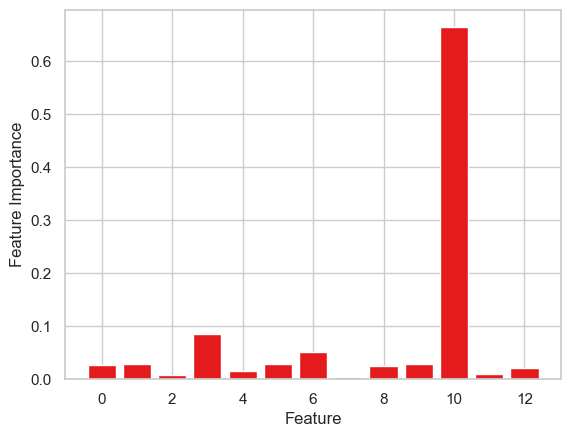

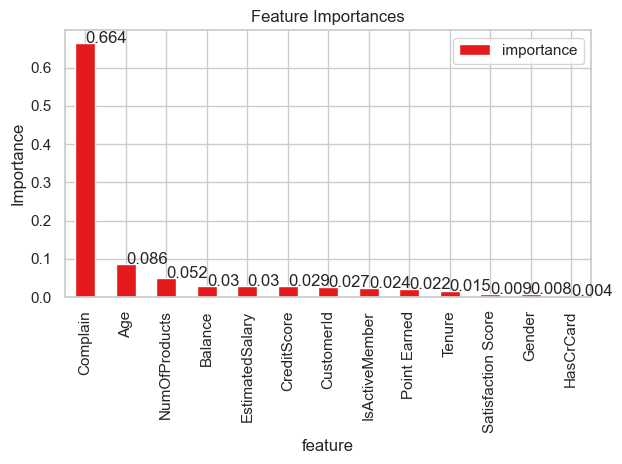

Text(0, 0.5, 'Importance')

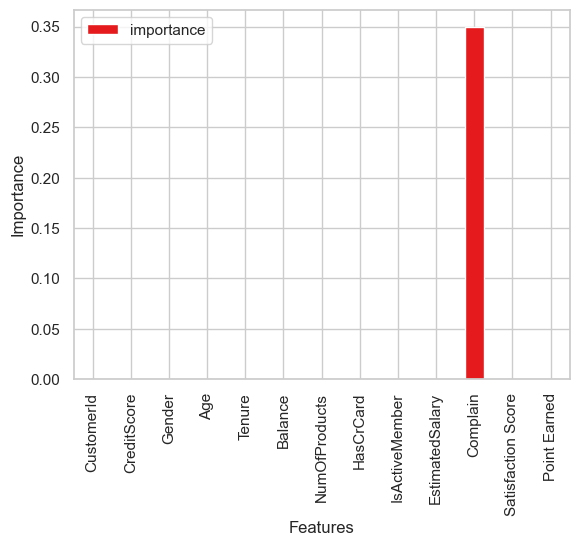

In [49]:
#Random Forest Feature Importances
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
plt.bar(x=range(len(importances)), height=importances)
plt.ylabel('Feature Importance')
plt.xlabel('Feature')

# Get importances
importances = rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create dataframe with features and importances
importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance
importances_df = importances_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Plot
importances_df.plot.bar(x='feature', y='importance', rot=90)

# Annotate bars with importances
for index, row in importances_df.iterrows():
    plt.text(row.name, row.importance, round(row.importance, 3))

plt.title("Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Permutation importances
result = permutation_importance(rf, X_test, y_test)

# Create dataframe with importances
importances_df = pd.DataFrame({'feature': feature_names,
                               'importance': result.importances_mean})

# Plot
importances_df.plot.bar(x='feature', y='importance', rot=90)
plt.xlabel('Features')
plt.ylabel('Importance')

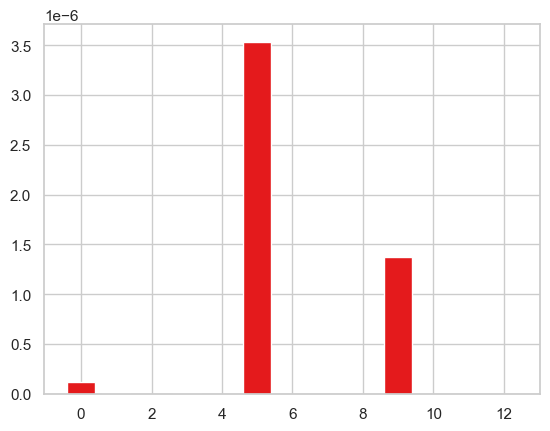

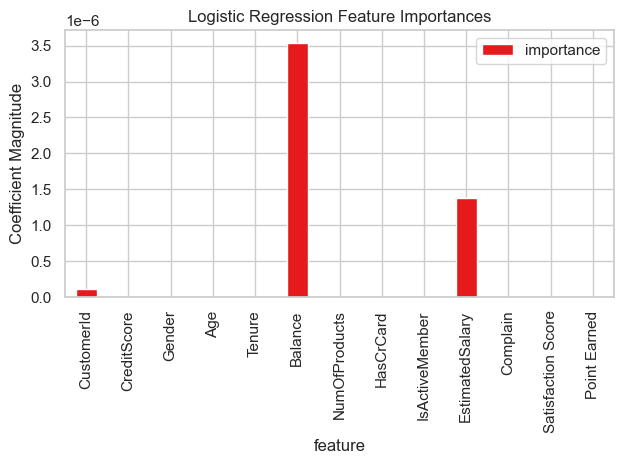

In [50]:
# #Logistic Regression Coefficients

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

importances = abs(logreg.coef_[0])
#plt.bar(importances)
plt.bar(x=range(len(importances)), height=importances)

# Get feature names
feature_names = X_train.columns

# Create dataframe for plotting
importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Plot bar chart
importances_df.plot.bar(x='feature', y='importance', rot=90)

plt.title("Logistic Regression Feature Importances")
plt.ylabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

In [51]:
print(X_train.head(5))

     CustomerId  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
540    15667896          833       1   37       8  151226.18              2   
303    15624188          712       0   33       6       0.00              2   
975    15685357          750       0   36       8  112940.07              1   
649    15703119          652       1   38       6       0.00              2   
767    15677921          720       1   60       9  115920.62              2   

     HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
540          1               1        136129.49         0                   3   
303          1               1        190686.16         0                   5   
975          0               1          9855.81         0                   3   
649          1               1        145700.22         0                   2   
767          0               0        157552.08         1                   1   

     Point Earned  
540           633 

Stacking Ensemble ML modeling pipeline [BEGIN CHECK FROM HERE]
1. Focuses on creating a stacked ensemble model with base models and meta model
2. Tuned Random Forest hyperparameters using GridSearchCV
3. Stacks base models like Logistic Regression, Random Forest using meta-learner
4. Logs metrics and parameters with MLflow for tracking experiments
5. Includes model explanations using LIME and SHAP
6. Handles validation set and converting probabilities to metrics
7. More productionized approach with MLflow and model diagnostics

In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, f1_score, roc_curve
)
#from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
import mlflow
import mlflow.sklearn
import lime
import shap
import warnings

warnings.simplefilter('ignore')

# Define the ChurnPredictor class
class ChurnPredictor:
    def __init__(self):
        self.models = []
        self.stack = None

    def add_model(self, model):
        self.models.append(model)

    def fit(self, X_train, y_train):
        # Extract feature names
        feature_names = X_train.columns
        X_train.columns = feature_names

        # Start an MLflow run
        with mlflow.start_run():
            try:
                # Tune RF hyperparameters
                rf_grid = {'n_estimators': [100, 200], 'max_depth': [4, 6]}
                rf_gs = GridSearchCV(RandomForestClassifier(), rf_grid, cv=5)
                rf_gs.fit(X_train, y_train)

                self.rf = rf_gs.best_estimator_

                # Log RF params with MLflow
                mlflow.log_params(self.rf.get_params())


                # Train base models
                for model in self.models:
                    model.fit(X_train, y_train)

                # Create stacking ensemble
                self.stack = StackingClassifier(
                    estimators=[(str(i), model) for i, model in enumerate(self.models)],
                    final_estimator=LogisticRegression(),
                    cv=5,  # Specify the number of cross-validation folds
                    stack_method='predict_proba',  # Use 'predict_proba' for ROC AUC
)

                # self.stack = StackingClassifier(
                #     classifiers=self.models,
                #     meta_classifier=LogisticRegression(),
                #     use_probas=True
                # )


                # Create stack ensemble
                self.stack.fit(X_train, y_train)

                # Use feature names from X_train.columns
                feature_names = X_train.columns

                # Log feature names as tags
                mlflow.log_param('feature_names', ', '.join(feature_names))



            finally:
                # Ensure the MLflow run is always ended
                mlflow.end_run()

    def predict(self, X_test):
        try:
        #       proba_scores = self.stack.predict_proba(X_test)
        #       return proba_scores[:, 1]

        # except NotImplementedError:
        #       predictions = self.stack.predict(X_test)
        #       return predictions

            # Try to get probabilities using predict_proba. Assuming binary classification
            proba_scores = self.stack.predict_proba(X_test)

            # Ensure probabilities sum to 1
            assert np.allclose(np.sum(proba_scores, axis=1), 1.0), "Probabilities do not sum to 1"

            ## Return the probabilitiess
            return proba_scores[:, 1]

        except NotImplementedError:
            # Handle classifiers without probability scores. Return probability scores
            proba_scores = self.stack.predict_proba(X_test)
            return proba_scores[:, 1]

    def _validate_input(self, X):
        if isinstance(X, pd.DataFrame):
            return X
        elif isinstance(X, np.ndarray):
            # Convert NumPy array to DataFrame, assuming columns are named numerically
            return pd.DataFrame(X, columns=[str(i) for i in range(X.shape[1])])
        else:
            raise ValueError("Input must be a DataFrame or a NumPy array.")

    # evalute method
    def evaluate(self, X_test, y_test):
        binary_labels = None
        binary_predictions = None
        metrics = None
        with mlflow.start_run():
            try:
                # Extract feature names
                feature_names = X_test.columns

                if y_test is None:
                    raise ValueError("y_test cannot be None.")

                # Get predictions
                predictions = self.predict(X_test)

                if predictions is None:
                    raise ValueError("Predictions cannot be None.")

                threshold = 0.5
                binary_predictions = (predictions > threshold).astype(int)
                binary_labels = (y_test > threshold).astype(int).values

                # Model evaluation
                # print("classification_report:")
                # print(classification_report(binary_labels, binary_predictions, zero_division="warn"))

                # Log metrics with MLflow
                mlflow.log_metric("test_accuracy", accuracy_score(binary_labels, binary_predictions))
                mlflow.log_metric("test_roc_auc", roc_auc_score(binary_labels, predictions))
                precision = precision_score(binary_labels, binary_predictions, zero_division=1)
                mlflow.log_metric("precision", precision)
                f1 = f1_score(binary_labels, binary_predictions)
                mlflow.log_metric("f1", f1)


            finally:
                if binary_labels is not None:
                    metrics = {
                        "accuracy": accuracy_score(binary_labels, binary_predictions),
                        "roc_auc": roc_auc_score(binary_labels, predictions)
                    }

        return predictions, metrics


    def evaluate_cv(self, X_train, y_train, cv=5):
        with mlflow.start_run():
            try:
                # Use cross_val_score for cross-validated evaluation
                #scores = cross_val_score(self.stack, X_train, y_train, cv=cv, scoring='accuracy')
                scores = cross_val_score(self.stack, X_train, y_train, cv=cv, scoring='roc_auc')


                # Log the average and standard deviation of accuracy across folds
                mlflow.log_metric("cv_accuracy_mean", scores.mean())
                mlflow.log_metric("cv_accuracy_std", scores.std())

            finally:
                # Ensure the MLflow run is always ended
                mlflow.end_run()

# Function to load test labels
def load_test_labels(series):
    return series

# Load test labels
y_true = load_test_labels(df_encoded['Exited'])


# Instantiate ChurnPredictor
predictor = ChurnPredictor()

# Hyperparameter tuning for RandomForest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

# GridSearchCV with rf model
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='roc_auc')


# Fit GridSearchCV to find the best hyperparameters
rf_grid_search.fit(X_train, y_train)

# Access the best model from the grid search
best_rf = rf_grid_search.best_estimator_

# Add models to ChurnPredictor
predictor.add_model(best_rf)
predictor.add_model(LogisticRegression(max_iter=1000))


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit and evaluate
predictor.fit(X_train, y_train)
predictions, metrics = predictor.evaluate(X_test, y_test)
predictor.evaluate_cv(X_train, y_train)

# Print the best hyperparameters for RandomForest
print("Best hyperparameters for RandomForest:", rf_grid_search.best_params_)

# Make predictions on test set
predictions = predictor.predict(X_test)

# Log MLflow metrics
with mlflow.start_run():
    mlflow.log_params({
        "model_count": len(predictor.models),
        "feature_names": ', '.join(X.columns),
    })
    mlflow.log_metrics(metrics)

# Get the final estimator from the fitted stack ensemble
meta_classifier = predictor.stack.final_estimator

# Cross validate meta classifier
scores = cross_val_score(meta_classifier, X_train, y_train, cv=5, scoring='roc_auc')

# Log metrics
mlflow.log_metric("cv_accuracy_mean", scores.mean())






# Feature importance with Shap
# explainer = shap.Explainer(meta_classifier)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)

# Feature importance with Lime
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     X_test.values,
#     feature_names=X_test.columns,
#     class_names=["Negative", "Positive"],
#     discretize_continuous=True
# )
# exp = explainer.explain_instance(X_test.values[0], predictor.predict, num_features=10)
# exp.show_in_notebook()




Best hyperparameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [53]:
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=200
)

# Add the best RandomForestClassifier to the ChurnPredictor
predictor.add_model(best_rf)


In [54]:
# import mlflow
# import numpy as np
# #import pandas as pd
# from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, log_loss, roc_auc_score,classification_report, roc_curve, precision_recall_curve
# from sklearn.model_selection import cross_val_score
# import lime
# import shap
# from IPython.display import display
# from sklearn.metrics import precision_score
# from sklearn.metrics import make_scorer, precision_score, f1_score
# from sklearn.model_selection import KFold


# class ChurnPredictor:
#     def __init__(self):
#         self.models = []
#         self.stack = None

#     def add_model(self, model):
#         self.models.append(model)

#     def fit(self, X_train, y_train):
#         # Extract feature names
#         feature_names = X_train.columns
#         X_train.columns = feature_names

#         # Start an MLflow run
#         with mlflow.start_run():
#             try:
#                 # Tune RF hyperparameters
#                 rf_grid = {'n_estimators': [100, 200], 'max_depth': [4, 6]}
#                 rf_gs = GridSearchCV(RandomForestClassifier(), rf_grid, cv=5)
#                 rf_gs.fit(X_train, y_train)

#                 self.rf = rf_gs.best_estimator_

#                 # Log RF params with MLflow
#                 mlflow.log_params(self.rf.get_params())


#                 # Train base models
#                 for model in self.models:
#                     model.fit(X_train, y_train)

#                 # Create stacking ensemble
#                 self.stack = StackingClassifier(
#                     estimators=[(str(i), model) for i, model in enumerate(self.models)],
#                     final_estimator=LogisticRegression(),
#                     stack_method='predict_proba'
#                 )

#                 # Create stack ensemble
#                 self.stack.fit(X_train, y_train)

#                 # Use feature names from X_train.columns
#                 feature_names = X_train.columns

#                 # Log feature names as tags
#                 mlflow.log_param('feature_names', ', '.join(feature_names))



#             finally:
#                 # Ensure the MLflow run is always ended
#                 mlflow.end_run()

#     def predict(self, X_test):
#         try:

#             # Try to get probabilities using predict_proba. Assuming binary classification
#             proba_scores = self.stack.predict_proba(X_test)

#             # Ensure probabilities sum to 1
#             assert np.allclose(np.sum(proba_scores, axis=1), 1.0), "Probabilities do not sum to 1"

#             ## Return the probabilitiess
#             return proba_scores[:, 1]

#         except NotImplementedError:
#             # Handle classifiers without probability scores. Return probability scores
#             proba_scores = self.stack.predict_proba(X_test)
#             return proba_scores[:, 1]

#     def _validate_input(self, X):
#         if isinstance(X, pd.DataFrame):
#             return X
#         elif isinstance(X, np.ndarray):
#             # Convert NumPy array to DataFrame, assuming columns are named numerically
#             return pd.DataFrame(X, columns=[str(i) for i in range(X.shape[1])])
#         else:
#             raise ValueError("Input must be a DataFrame or a NumPy array.")

#     # evalute method
#     def evaluate(self, X_test, y_test):
#         binary_labels = None
#         binary_predictions = None
#         metrics = None
#         with mlflow.start_run():
#             try:
#                 # Extract feature names
#                 feature_names = X_test.columns

#                 if y_test is None:
#                     raise ValueError("y_test cannot be None.")

#                 # Get predictions
#                 predictions = self.predict(X_test)

#                 if predictions is None:
#                     raise ValueError("Predictions cannot be None.")

#                 threshold = 0.5
#                 binary_predictions = (predictions > threshold).astype(int)
#                 binary_labels = (y_test > threshold).astype(int).values

#                 # Model evaluation
#                 # print("classification_report:")
#                 # print(classification_report(binary_labels, binary_predictions, zero_division="warn"))

#                 # Log metrics with MLflow
#                 mlflow.log_metric("test_accuracy", accuracy_score(binary_labels, binary_predictions))
#                 mlflow.log_metric("test_roc_auc", roc_auc_score(binary_labels, predictions))
#                 precision = precision_score(binary_labels, binary_predictions)
#                 mlflow.log_metric("precision", precision)
#                 f1 = f1_score(binary_labels, binary_predictions)
#                 mlflow.log_metric("f1", f1)

#                 # Print feature names
#                 #print("Feature Names:", feature_names)

#                 # Choose the number of features for explanation (num_features)
#                 #num_features = 10

#                 #X_test_df = pd.DataFrame(X_test, columns=feature_names)

#                 # Lime
# #                 explainer = lime.lime_tabular.LimeTabularExplainer(
# #                     X_test_df.values,
# #                     feature_names=feature_names,
# #                     class_names=["Negative", "Positive"],
# #                     discretize_continuous=True
# #                 )
# #                 exp = explainer.explain_instance(X_test_df.values[0], self.predict, num_features=10)
# #                 exp.show_in_notebook()

# #             # Shap
# #                 background = shap.sample(X_test_df, 100)
# #                 explainer = shap.KernelExplainer(self.stack.predict, background)
# #                 shap_values = explainer.shap_values(X_test_df)
# #                 shap.summary_plot(shap_values, X_test_df)


#             finally:
#                 if binary_labels is not None:
#                     metrics = {
#                         "accuracy": accuracy_score(binary_labels, binary_predictions),
#                         "roc_auc": roc_auc_score(binary_labels, predictions)
#                     }

#         return predictions, metrics


#     def evaluate_cv(self, X_train, y_train, cv=5):
#         with mlflow.start_run():
#             try:
#                 # Use cross_val_score for cross-validated evaluation
#                 scores = cross_val_score(self.stack, X_train, y_train, cv=cv, scoring='accuracy')

#                 # Log the average and standard deviation of accuracy across folds
#                 mlflow.log_metric("cv_accuracy_mean", scores.mean())
#                 mlflow.log_metric("cv_accuracy_std", scores.std())

#             finally:
#                 # Ensure the MLflow run is always ended
#                 mlflow.end_run()

# # exited_column = 'Exited'
# df_encoded = df[['Exited']]

# # Modify the function to directly accept a Pandas Series
# def load_test_labels(series):
#     """
#     Load the labels from the given Pandas Series.

#     Args:
#         series (pandas.Series): The Series containing the labels.

#     Returns:
#         pandas.Series: The labels from the Series.
#     """
#     return series

# # Load test labels
# # y_true = load_test_labels(y_test)

# y_true = load_test_labels(df_encoded['Exited'])

# # Print column names
# print(df_encoded.columns)


# # Load test labels
# # y_true = load_test_labels(y_test)

# # Instantiate ChurnPredictor
# predictor = ChurnPredictor()

# # Add models
# predictor.add_model(LogisticRegression(max_iter=1000))
# predictor.add_model(RandomForestClassifier())

# # Fit and evaluate
# predictor.fit(X_train, y_train)
# predictions = predictor.evaluate(X_test, y_test)
# predictor.evaluate_cv(X_train, y_train)

# # Make predictions on test set
# predictions = predictor.predict(X_test)

# # Convert to numpy arrays
# y_true_arr = np.array(y_true)
# predictions_arr = np.array(predictions)

# y_true_arr = y_true.astype(int)  # Convert to integer if not already
# predictions_arr = predictions.astype(int)  # Convert to integer if not already


# print("Unique values in y_true:", np.unique(y_true_arr))
# print("Unique values in predictions:", np.unique(predictions_arr))

# print("Sample y_true values:", y_true_arr[:10])
# print("Sample predictions values:", predictions_arr[:10])


# # Ensure the shapes match
# print("X_test shape:", X_test.shape)
# print("y_true shape:", y_true.shape)
# print("predictions shape:", predictions.shape)

# # Print some information for debugging
# print("Number of unique values in y_true:", len(np.unique(y_true)))
# print("Number of unique values in predictions:", len(np.unique(predictions)))

# print(len(y_true), len(predictions))
# # Example: Printing the first few elements of y_true and predictions
# print("y_true:", y_true[:5])
# print("predictions:", predictions[:5])
# # Example: Checking the lengths of training and testing sets
# print("Training set length:", len(X_train))
# print("Testing set length:", len(X_test))



# # fpr, tpr, _ = roc_curve(y_true, predictions)
# # # Plot ROC curve
# # plt.figure(figsize=(8, 6))
# # plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
# # plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
# # plt.xlabel('False Positive Rate')
# # plt.ylabel('True Positive Rate')
# # plt.title('ROC Curve')
# # plt.legend()
# # plt.show()

# # Print shapes
# print("y_true shape:", y_test.shape)
# print("predictions shape:", predictions.shape)

# # Check lengths
# if len(y_true) != len(predictions):
#     print("Lengths mismatch: y_true has {0} samples vs {1} in predictions".format(len(y_true), len(predictions)))
#     # Handle mismatch here e.g., check test set size, prediction shape, etc.

# # Metric calculation
# accuracy = accuracy_score(y_true_arr, predictions_arr)

# # Convert to numpy arrays
# # y_true_arr = np.array(y_true)
# # predictions_arr = np.array(predictions)

# # Print shapes
# print("y_true array shape:", y_true_arr.shape)
# print("predictions array shape:", predictions_arr.shape)

# # Classification report
# print("classification_report:")
# print(classification_report(y_true_arr, predictions_arr, zero_division="warn"))

# # ROC Curve
# fpr, tpr, _ = roc_curve(y_true, predictions)
# plt.plot(fpr, tpr)
# plt.title('ROC Curve')

# # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_true, predictions)
# plt.plot(recall, precision)

# # Cross-validation
# # print("cross_val_score:")
# # print(cross_val_score(predictor.stack, X_test, y_true, cv=5))

# # Cross-validation
# precision_scorer = make_scorer(precision_score, zero_division=1)
# f1_scorer = make_scorer(f1_score, zero_division=1)

# # Use appropriate scoring metric for binary classification
# cv_accuracy_scores = cross_val_score(predictor.stack, X_test, y_true, cv=5, scoring='accuracy')
# cv_precision_scores = cross_val_score(predictor.stack, X_test, y_true, cv=5, scoring=precision_scorer)
# cv_f1_scores = cross_val_score(predictor.stack, X_test, y_true, cv=5, scoring=f1_scorer)

# # Print cross-validation results
# print("Cross-validated Accuracy:", cv_accuracy_scores)
# print("Cross-validated Precision:", cv_precision_scores)
# print("Cross-validated F1 Score:", cv_f1_scores)


# # Log metrics
# mlflow.log_metric("test_roc_auc", roc_auc_score(y_true, predictions))



In [55]:
# Check data types
print("Data type of y_test:", y_test.dtype)
print("Data type of predictions:", predictions.dtype)

# Check unique values
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in predictions:", np.unique(predictions))

# If needed, convert data types
y_test = y_test.astype(int)
predictions = predictions.astype(int)


Data type of y_test: int64
Data type of predictions: float64
Unique values in y_test: [0 1]
Unique values in predictions: [0.0139338  0.01393414 0.01393418 0.01393445 0.01393447 0.01393588
 0.01393859 0.01393926 0.01393982 0.01394001 0.01394026 0.01394075
 0.01394138 0.01394208 0.01394212 0.01394214 0.01394466 0.01394517
 0.01394571 0.01394583 0.01394776 0.01395017 0.01395029 0.01395137
 0.01396882 0.01397383 0.01397649 0.01397671 0.01397828 0.01397837
 0.0139873  0.01398747 0.01398941 0.01399152 0.01399566 0.01399727
 0.01399929 0.01399997 0.01400042 0.01400193 0.01400605 0.01401144
 0.01401217 0.01401222 0.0140189  0.01403243 0.01405962 0.01411991
 0.01413678 0.01414331 0.01417564 0.0141771  0.01417723 0.01418077
 0.01426896 0.0143115  0.01431837 0.01435255 0.01436769 0.01437726
 0.01437908 0.01444514 0.01447837 0.01459277 0.01460152 0.01466465
 0.01467614 0.01475748 0.01479388 0.01483548 0.01509935 0.0152788
 0.01535576 0.0162207  0.01622132 0.01622691 0.01622909 0.01623038
 0.01623

In [56]:
# This code adds a new "Date" column with datetime values and sets it as the index,
# effectively replacing the "RowNumber" column. Other existing columns will be
# retained in the DataFrame. Make sure to replace "Date" with the actual name of
# the existing column you want to keep.

import pandas as pd
import numpy as np

# Make a copy from the original dataset
df_subset2 = df_copy1.copy()
df_subset2['Gender'] = df_subset2['Gender'].map({'Female': 0, 'Male': 1})

# Add a time index: using the logical ordering (e.g., row number),
# replace the "RowNumber" column with datetime values.
df_subset2["Date"] = pd.date_range('1/1/2000', periods=len(df_subset2))
df_subset2.set_index("Date", inplace=True)

# Checkpoint : Print the resulting DataFrame
print("dataframe before dropping & encpdeding:")
print(df_subset2.head())

# Drop columns you want to exclude
df_subset2 = df_subset2.drop(['Surname', 'Geography', 'Card Type'], axis=1)

# One-hot encoding
df_encoded2 = pd.get_dummies(df_subset2, dummy_na=True)

# columns_to_exclude = ['Exited']

# X = df_encoded2.drop(columns_to_exclude, axis=1)
# y = df_encoded2['Exited']

# # Split the data into training, Temporary and testing sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #,

# # Split the temporary set into validation and test sets
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checkpoint : Print the resulting DataFrame
print("dataframe before dropping & encpdeding::")
print(df_encoded2.head())

dataframe before dropping & encpdeding:
            RowNumber  CustomerId   Surname  CreditScore Geography  Gender  \
Date                                                                         
2000-01-01          1    15634602  Hargrave          619    France       0   
2000-01-02          2    15647311      Hill          608     Spain       0   
2000-01-03          3    15619304      Onio          502    France       0   
2000-01-04          4    15701354      Boni          699    France       0   
2000-01-05          5    15737888  Mitchell          850     Spain       0   

            Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Date                                                                           
2000-01-01   42       2       0.00              1          1               1   
2000-01-02   41       1   83807.86              1          0               1   
2000-01-03   42       8  159660.80              3          1               0   
2000-01-04   

In [57]:
# # Continuous sequence data
# df_seq = df[['continuous_time_series_features']]

# # Static categorical data
# df_cat = df[['categorical_features']]

# # User ids
# df_users = df[['user_id']].drop_duplicates()

# # Item ids
# df_items = df[['item_id']].drop_duplicates()

# # Target
# df_target = df[['target']]

# # Feature of interest
# df_feat = df[['feature']]

In [58]:
# Temporal GNN-NCF integration
# implementation of custom RNN, GNN, and NCF modules integrated into a TNRFinalModel architecture.
# This code defines custom PyTorch modules for building a Temporal Neural Recommender (TNR) system that integrates RNN, GNN, and NCF components. Here is an overall explanation:
# RNNModule: Processes sequential user behavior data. Uses an LSTM layer followed by fully-connected layers. Takes in input sequences and generates embeddings.
# GNNModule: Handles graph structured data like user-item interactions. Uses a custom GraphConv layer for graph convolutions. Generates user/item embeddings.
# NCFModule: Neural network based collaborative filtering. Learns embeddings for user-item ratings/interactions. Multi-layer perceptron on concatenated embeddings.
# TNRFinalModel: Integrates all 3 components. Accepts inputs for RNN, GNN, NCF and passes them through the respective modules. Concats the outputs currently but can explore weighted averages.
# So in summary:
# RNN captures dynamics
# GNN learns connections
# NCF provides collaborative filtering
# The components are brought together in the final model to leverage different input types. This allows capturing multiple behavioral signals.

In [79]:
# customize model
import torch
import torch.nn as nn
import torch.nn.functional as F


class RNNModule(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModule, self).__init__()
        self.rn_input_size = input_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first =True)
        self.fc = nn.Linear(hidden_size, output_size, 32) #output size 32

    def forward(self, x):
        out, _ = self.lstm(x)
        print(out.shape)
        # Access features directly 
        out = self.fc(out)
        return out


class GraphConv(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConv, self).__init__()
        # Define your graph convolution layer parameters here

    def forward(self, adj, features):
        # Implement the forward pass of your graph convolution layer
        # The input 'adj' is the adjacency matrix and 'features' are node features
        # implementation will depend on the specific type of graph convolution used
        print("adj matrix shape:"adj.shape)
        print("features matrix shape:"features.shape)
        
        # Transpose features
        features = features.t() 
        # Assuming a basic graph convolution operation
        output = torch.matmul(adj, features)  # Adjust this based on the actual graph convolution operation

        return output

class GNNModule(nn.Module):
    def __init__(self, input_features, hidden_features, output_features):
        super(GNNModule, self).__init__()
        self.gnn_input_features = input_features

        # Assuming GraphConv is a custom graph convolution layer
        self.gc = GraphConv(input_features, output_features)
        self.fc = nn.Linear(output_features, output_features)  # Adjust the linear layer based on your needs

    def forward(self, adj, features):
        # Apply graph convolution
        gc_output = self.gc(adj, features)

        # Apply a linear layer or any other operations based on your architecture
        output = self.fc(gc_output)

        return output


class NCFModule(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NCFModule, self).__init__()
        self.ncf_input_size = input_size

        # Embedding layers for user and item
        self.user_embedding = nn.Embedding(input_size, hidden_size)
        self.item_embedding = nn.Embedding(input_size, hidden_size)

        # Fully connected layers
        self.fc1 = nn.Linear(2 * hidden_size, 64)  # Concatenate user and item embeddings
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, user_ids, item_ids):
        # Embed user and item IDs
        user_embedded = self.user_embedding(user_ids)
        item_embedded = self.item_embedding(item_ids)

        # Concatenate user and item embeddings
        concatenated = torch.cat([user_embedded, item_embedded], dim=1)

        # Forward pass through fully connected layers
        x = self.relu(self.fc1(concatenated))
        x = self.relu(self.fc2(x))
        output = self.fc3(x)

        return output


class TNRFinalModel(nn.Module):
    def __init__(self, rn_input_size, gnn_input_features, ncf_input_size, hidden_size, output_size):
        super(TNRFinalModel, self).__init__()

        self.rnn_module = RNNModule(rn_input_size, hidden_size, output_size)
        self.gnn_module = GNNModule(gnn_input_features, hidden_size, output_size)
        self.ncf_module = NCFModule(ncf_input_size, hidden_size, output_size)

    def forward(self, rnn_input, gnn_adj, gnn_features, ncf_user_ids, ncf_item_ids):
        rnn_output = self.rnn_module(rnn_input)
        gnn_output = self.gnn_module(gnn_adj, gnn_features)
        ncf_output = self.ncf_module(ncf_user_ids, ncf_item_ids)

        # Combine the outputs of the three modules as needed
        TNRFinalModel_output = torch.cat([rnn_output, gnn_output, ncf_output], dim=1)

        return TNRFinalModel_output



SyntaxError: invalid syntax. Perhaps you forgot a comma? (360091710.py, line 31)

In [80]:
# Temporal Neural Relational Model
# Here is a high-level summary of what this code snippet is doing:
# 1. Loads customer data into a DataFrame (df)
# 2. Constructs a directed graph (G) from the customer data
# 3. Simulates customer timelines using DFS graph traversal
# 4. Preprocesses input features (X_feat_existing), adjacency matrices (A_train_existing), sequences (X_seq_existing) etc.
# 5. Defines RNN, GNN, and NCF modules to process the different data types
# 6. Validates input sizes, handles inconsistencies via padding/truncation
# 7. Splits data into train/test sets, converts to PyTorch tensors
# 8. Instantiates integrated TNRFinalModel combining all modules
# 9. Sets up dataloader, optimizer, loss function, training loop
# 10. Trains model, tracks validation loss
# 11. Defines prediction function on test data
# 12. Evaluates model on test set using classification metrics
# In summary, it loads transactional customer data, constructs input features/sequences, trains a Temporal Neural Recommender model with RNN, GNN, NCF components, and evaluates its performance.
# The key steps are data preprocessing, input validation, model training loop, and evaluation.


In [81]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import networkx as nx
from networkx import dfs_edges, dfs_labeled_edges
import tensorflow as tf
import pandas as pd
import networkx as nx

# Assuming df_encoded2 is your DataFrame
# Categorical data
cat_cols = ['Gender', 'CreditScore', 'Age']
A_cat = df_encoded2[cat_cols]

# Adjacency matrix
adj_cols = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']
A_adj = df_encoded2[adj_cols]

# Assert shapes
assert A_cat.shape[1] == len(cat_cols)
assert A_adj.shape[1] == len(adj_cols)

# Additional features
add_feats = df_encoded2[['Balance','Complain', 'Satisfaction Score', 'Point Earned']]

gnn_input_features = 3
# Concat with additional features
A_train = np.concatenate([A_adj, add_feats], axis=1)

print(f"Final A_train shape: {A_train.shape}")
#assert A_train.shape[1] == gnn_input_features


# Extract input tensors from preprocessed data
# X_seq_existing (continuous time series data)
X_seq_existing = df_encoded2[['Tenure']].values

# A_train_existing (categorical static data)
A_train_existing = A_train   #df_encoded2[['NumOfProducts', 'HasCrCard', 'IsActiveMember']].values

# X_feat_existing (feature of interest)
X_feat_existing = df_encoded2[['EstimatedSalary']].values

# user_ids_existing
user_ids_existing = df_encoded2['CustomerId'].unique()

# item_ids_existing
item_ids_existing = df_encoded2[['RowNumber']].values
# Make 1D
item_ids_existing = item_ids_existing[:,0]

# y_existing
y_existing = df_encoded2[['Exited']].values

# Before feeding the data into the model, print or log the sizes of your input tensors.
# This is to quickly check if the dimensions match expectations.

print(f"X_seq_existing shape: {X_seq_existing.shape}")
print(f"A_train_existing shape: {A_train_existing.shape}")
print(f"X_feat_existing shape: {X_feat_existing.shape}")
print(f"user_ids_existing shape: {user_ids_existing.shape}")
print(f"item_ids_existing shape: {item_ids_existing.shape}")
print(f"y_existing shape: {y_existing.shape}")

# Define input sizes
rn_input_size = 1
gnn_input_features = 7
ncf_input_size = 1
hidden_size = 32
output_size = 1

assert X_seq_existing.shape[1] == rn_input_size, "Mismatch in RNN input size and sequence feature size"
assert A_train_existing.shape[1] == gnn_input_features, "Mismatch in GNN input size and adjacency matrix size"
assert len(item_ids_existing.shape) == 1, "Item IDs should be a 1D array"
assert X_feat_existing.shape[1] == ncf_input_size, "Mismatch in NCF input size and existing features size"


# Instantiate modules
rnn_module = RNNModule(rn_input_size, hidden_size, output_size)
gnn_module = GNNModule(gnn_input_features, hidden_size, output_size)
ncf_module = NCFModule(ncf_input_size, hidden_size, output_size)

# Check input sizes
# print(f"RNN Input Size: {rnn_module.rn_input_size}")
# print(f"GNN Input Size: {gnn_module.gnn_input_features}")
# print(f"NCF Input Size: {ncf_module.ncf_input_size}")
print(X_seq_existing.shape)


# RNN Module
rnn_module = RNNModule(rn_input_size, hidden_size, output_size)

# Check sequence sizes
X_seq_existing = np.array(X_seq_existing)

if len(X_seq_existing.shape) == 1:
    seq_feature_size = 1
else:
    seq_feature_size = X_seq_existing.shape[1]

# # Assuming X_seq_existing is defined appropriately
# X_seq_existing = X_seq_existing.transpose()
# seq_feature_size = X_seq_existing.shape[0] if len(X_seq_existing.shape) > 1 else 1

try:
    seq_feature_size = X_seq_existing.shape[1]
except IndexError:
    seq_feature_size = 1

# Check if RNN input size matches sequence feature size
if rn_input_size != seq_feature_size:
    print(f"Error: RNN input size ({rn_input_size}) doesn't match sequence feature size ({seq_feature_size}).")

    X_seq = df_seqs[:, :]  # Slice to get sequence data

    # Handle the inconsistency (e.g., pad the sequences)
    if seq_size < rnn_size:
        pad_size = rnn_size - seq_size
        X_seq = tf.pad(X_seq, [[0, 0], [0, pad_size]])
    else:
        # Truncate sequences
        # Reshape X_seq_existing to have the desired shape
        X_seq_existing = np.expand_dims(X_seq_existing, axis=0)[:rn_input_size]

# Check the number of samples in each variable
print(f"X_seq_existing shape: {X_seq_existing.shape}")
print(f"y_existing shape: {y_existing.shape}")

num_samples_X_seq = X_seq_existing.shape[0]
#num_samples_rn = rn_input_size

num_samples_rn = 1000

# Resample to match RNN samples
X_seq_existing = X_seq_existing[:num_samples_rn]

print(f"Num samples in X_seq_existing: {num_samples_X_seq}")
print(f"Num samples expected by RNN: {num_samples_rn}")

# Ensure the number of samples is consistent
if num_samples_X_seq != num_samples_rn:
    # Handle the inconsistency (e.g., raise an error, resample the data, etc.)
    raise ValueError("Input variables have inconsistent numbers of samples")


# assuming gnn_module is an instance of GNNModule
gnn_module = GNNModule(gnn_input_features, hidden_size, output_size)

adj_feature_size = A_train_existing.shape[1]
item_ids_feature_size = item_ids_existing.shape[0]

if gnn_input_features != adj_feature_size or gnn_input_features != item_ids_feature_size:
    print("Error: GNN input size doesn't match adjacency matrix or item IDs feature size.")

# assuming ncf_module is an instance of NCFModule
ncf_module = NCFModule(ncf_input_size, hidden_size, output_size)

feat_feature_size = X_feat_existing.shape[1]

if ncf_input_size != feat_feature_size:
    print("Error: NCF input size doesn't match existing features size.")



# Split the data into training and testing sets
X_train_existing, X_test_existing, y_train_existing, y_test_existing = train_test_split(
    X_seq_existing, y_existing, test_size=0.3, random_state=42, stratify=y_existing
)

# Convert to PyTorch tensors
X_seq_train_tensor = torch.tensor(X_train_existing, dtype=torch.float32)
A_train_tensor = torch.tensor(A_train_existing, dtype=torch.float32)
X_feat_train_tensor = torch.tensor(X_feat_existing, dtype=torch.float32)
user_ids_train_tensor = torch.tensor(user_ids_existing, dtype=torch.long)
item_ids_train_tensor = torch.tensor(item_ids_existing, dtype=torch.long)
y_train_tensor = torch.tensor(y_train_existing, dtype=torch.float32)

#checkpoint:
print(len(X_seq_train_tensor)) # 1000
print(len(A_train_tensor)) # 800

# This will truncate the larger tensor to 700 samples to match size of the other.
X_seq_size = len(X_seq_train_tensor)
A_train_size = len(A_train_tensor)

min_size = min(X_seq_size, A_train_size)
max_size = max(X_seq_size, A_train_size)

if X_seq_size == max_size:
   X_seq_train_tensor = X_seq_train_tensor[:min_size]

elif A_train_size == max_size:
   A_train_tensor = A_train_tensor[:min_size]

print(len(X_seq_train_tensor)) # 1000
print(len(A_train_tensor)) # 800

# truncating all tensors to the minimum size of 700
min_size = 700

X_seq_train_tensor = X_seq_train_tensor[:min_size]
A_train_tensor = A_train_tensor[:min_size]
X_feat_train_tensor = X_feat_train_tensor[:min_size]
user_ids_train_tensor = user_ids_train_tensor[:min_size]
item_ids_train_tensor = item_ids_train_tensor[:min_size]
y_train_tensor = y_train_tensor[:min_size]


#  the sizes before creating the TensorDataset to identify the mismatch:
print(f"X_seq_train_tensor size: {X_seq_train_tensor.size(0)}")
print(f"A_train_tensor size: {A_train_tensor.size(0)}")
print(f"X_feat_train_tensor size: {X_feat_train_tensor.size(0)}")
print(f"user_ids_train_tensor size: {user_ids_train_tensor.size(0)}")
print(f"item_ids_train_tensor size: {item_ids_train_tensor.size(0)}")
print(f"y_train_tensor size: {y_train_tensor.size(0)}")


# Create a PyTorch dataset
dataset = TensorDataset(X_seq_train_tensor, A_train_tensor, X_feat_train_tensor, user_ids_train_tensor, item_ids_train_tensor, y_train_tensor)


# Model hyperparameters
rn_input_size = X_seq_existing.shape[1]
gnn_input_size = X_feat_existing.shape[1]
ncf_input_size = max(user_ids_existing.max(), item_ids_existing.max()) + 1
hidden_size = 50
output_size = 1

# Instantiate model
model = TNRFinalModel(rn_input_size, gnn_input_size, ncf_input_size, hidden_size, output_size)

# training hyperparameters
BATCH_SIZE = 20
EPOCHS = 10
LEARNING_RATE = 1e-3

# Get model parameters
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
loss_fn = nn.BCEWithLogitsLoss()  #nn.BCELoss()



# Create a DataLoader
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Validation loss tracking
val_losses = []
for epoch in range(EPOCHS):

    #Training loop
    model.train()
    for seq_batch, adj_batch, feat_batch, user_batch, item_batch, label_batch in train_loader:
        optimizer.zero_grad()

       

        # Forward pass
        output = model(seq_batch, adj_batch, feat_batch, user_batch, item_batch)
        
        # Print the shape of the output tensor
        print(output.shape)
        
        # Assuming binary classification (0 or 1)
        loss = loss_fn(output, label_batch.unsqueeze(1).float())

        # Backward pass
        loss.backward()

        optimizer.step()

        # Evaluate on validation set
        val_loss = evaluate(model, val_loader, loss_fn)
        val_losses.append(val_loss)


    # checkpointing
    if (epoch + 1) % checkpoint_interval == 5:
        torch.save(model.state_dict(), f'checkpoint_epoch_{epoch + 1}.pth')

    # Print metrics
    if i % print_every == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Plot train vs validation loss
plt.plot(val_losses)

# Prediction function
def predict(model, test_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for input in test_loader:
            pred = model(*input)
            predictions.append(pred.argmax(1))
    return torch.cat(predictions)

# Model evaluation
preds = predict(model, test_loader)
print(classification_report(y_test, preds))
print(f"Accuracy = {accuracy_score(y_test, preds)}")

Final A_train shape: (1000, 7)
X_seq_existing shape: (1000, 1)
A_train_existing shape: (1000, 7)
X_feat_existing shape: (1000, 1)
user_ids_existing shape: (1000,)
item_ids_existing shape: (1000,)
y_existing shape: (1000, 1)
(1000, 1)
X_seq_existing shape: (1000, 1)
y_existing shape: (1000, 1)
Num samples in X_seq_existing: 1000
Num samples expected by RNN: 1000
Error: GNN input size doesn't match adjacency matrix or item IDs feature size.
700
1000
700
700
X_seq_train_tensor size: 700
A_train_tensor size: 700
X_feat_train_tensor size: 700
user_ids_train_tensor size: 700
item_ids_train_tensor size: 700
y_train_tensor size: 700
torch.Size([20, 50])
torch.Size([20, 7])
torch.Size([20, 1])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (20x7 and 20x1)